<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [4]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import string
import warnings


warnings.filterwarnings('ignore')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [5]:
sat_scores_path = 'sat_scores.csv'

In [6]:
csv_rows = []
with open(sat_scores_path, 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()


In [7]:
header = csv_rows[0]
data = csv_rows[1:]

In [8]:
dizio={
    column_names:[column_values[i]   
    for column_values in data]       
    for i,column_names in enumerate(header)  
}



### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [9]:
df1 = pd.DataFrame(dizio)
df1.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [10]:
df2 = pd.read_csv(sat_scores_path)
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [11]:
df1.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

The output looks similar if you print it, but the columns in the DataFrame from the dictionary created from the csv are strings (objects), so we need to convert them. In the Pandas are numerical data already.

In [12]:
df2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [13]:
col_num = ['Rate', 'Verbal', 'Math']

In [14]:
df1[col_num] = df1[col_num].applymap(lambda x : float(x))
df2[col_num] = df2[col_num].applymap(lambda x : float(x))

In [15]:
df = df2 #Just changing the name for the Dataframe I am going to use

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [16]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82.0,509.0,510.0
1,NJ,81.0,499.0,513.0
2,MA,79.0,511.0,515.0
3,NY,77.0,495.0,505.0
4,NH,72.0,520.0,516.0
5,RI,71.0,501.0,499.0
6,PA,71.0,500.0,499.0
7,VT,69.0,511.0,506.0
8,ME,69.0,506.0,500.0
9,VA,68.0,510.0,501.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [17]:
list(df.dtypes)[2]

dtype('float64')

In [18]:
data_dictionary = {'Column':list(df.columns), 'Data Type': list(df.dtypes), 'Description': ['State where the data was taken', 'Final Rate, from 0 to 100', 'Verbal Result, from 0 to 800', 'Math Result, from 0 to 800']}#, 'Shape':[df.shape]*4 }
data_dict = pd.DataFrame(data_dictionary)
data_dict

,Column,Data Type,Description
0,State,object,State where the data was taken
1,Rate,float64,"Final Rate, from 0 to 100"
2,Verbal,float64,"Verbal Result, from 0 to 800"
3,Math,float64,"Math Result, from 0 to 800"


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

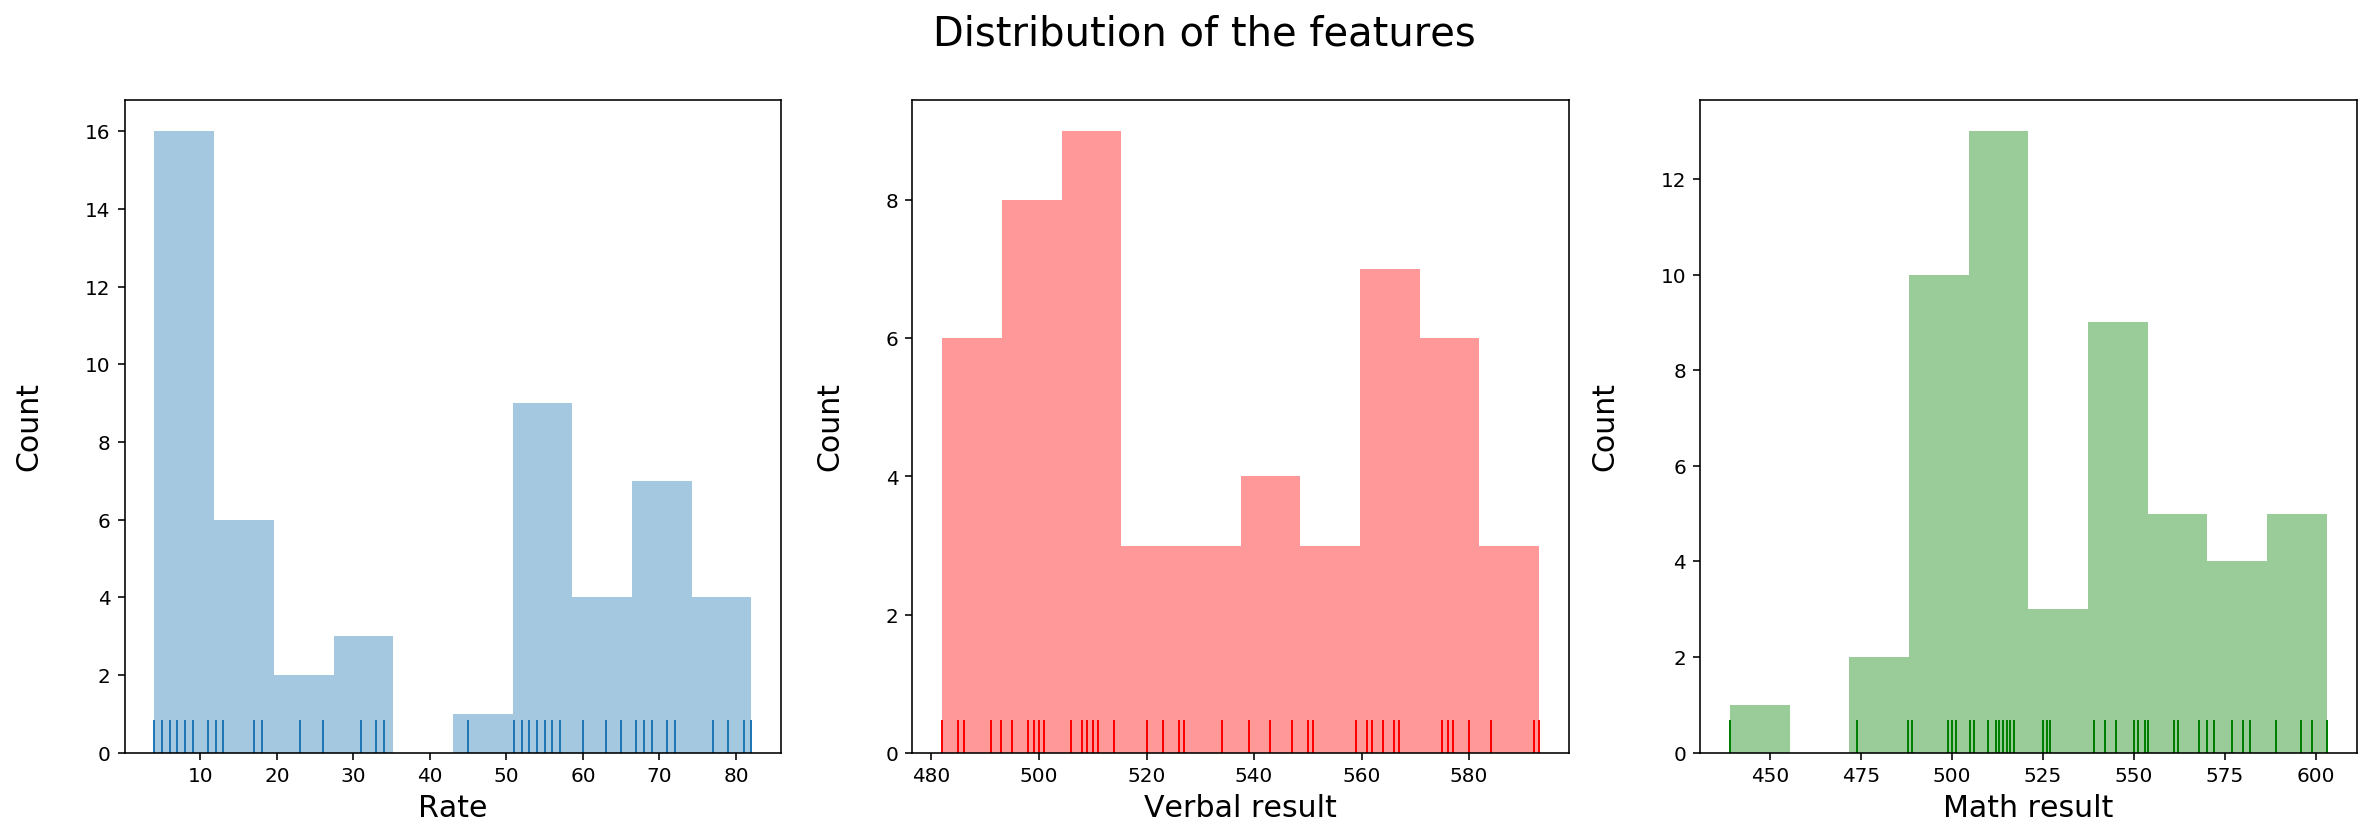

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
fig.suptitle('Distribution of the features', fontsize=20)
ax[0].set_ylabel('Count\n', fontsize=15)
ax[0].set_xlabel('Rate',fontsize=15)
sns.distplot(df[['Rate']], bins=10, kde = False, rug=True , ax=ax[0])

ax[1].set_ylabel('Count\n', fontsize=15)
ax[1].set_xlabel('Verbal result',fontsize=15)
sns.distplot(df[['Verbal']], bins=10, kde = False, rug=True , color = 'r', ax=ax[1])

ax[2].set_ylabel('Count\n', fontsize=15)
ax[2].set_xlabel('Math result',fontsize=15)
sns.distplot(df[['Math']], bins=10, kde = False, rug=True,  color = 'g' , ax=ax[2])
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

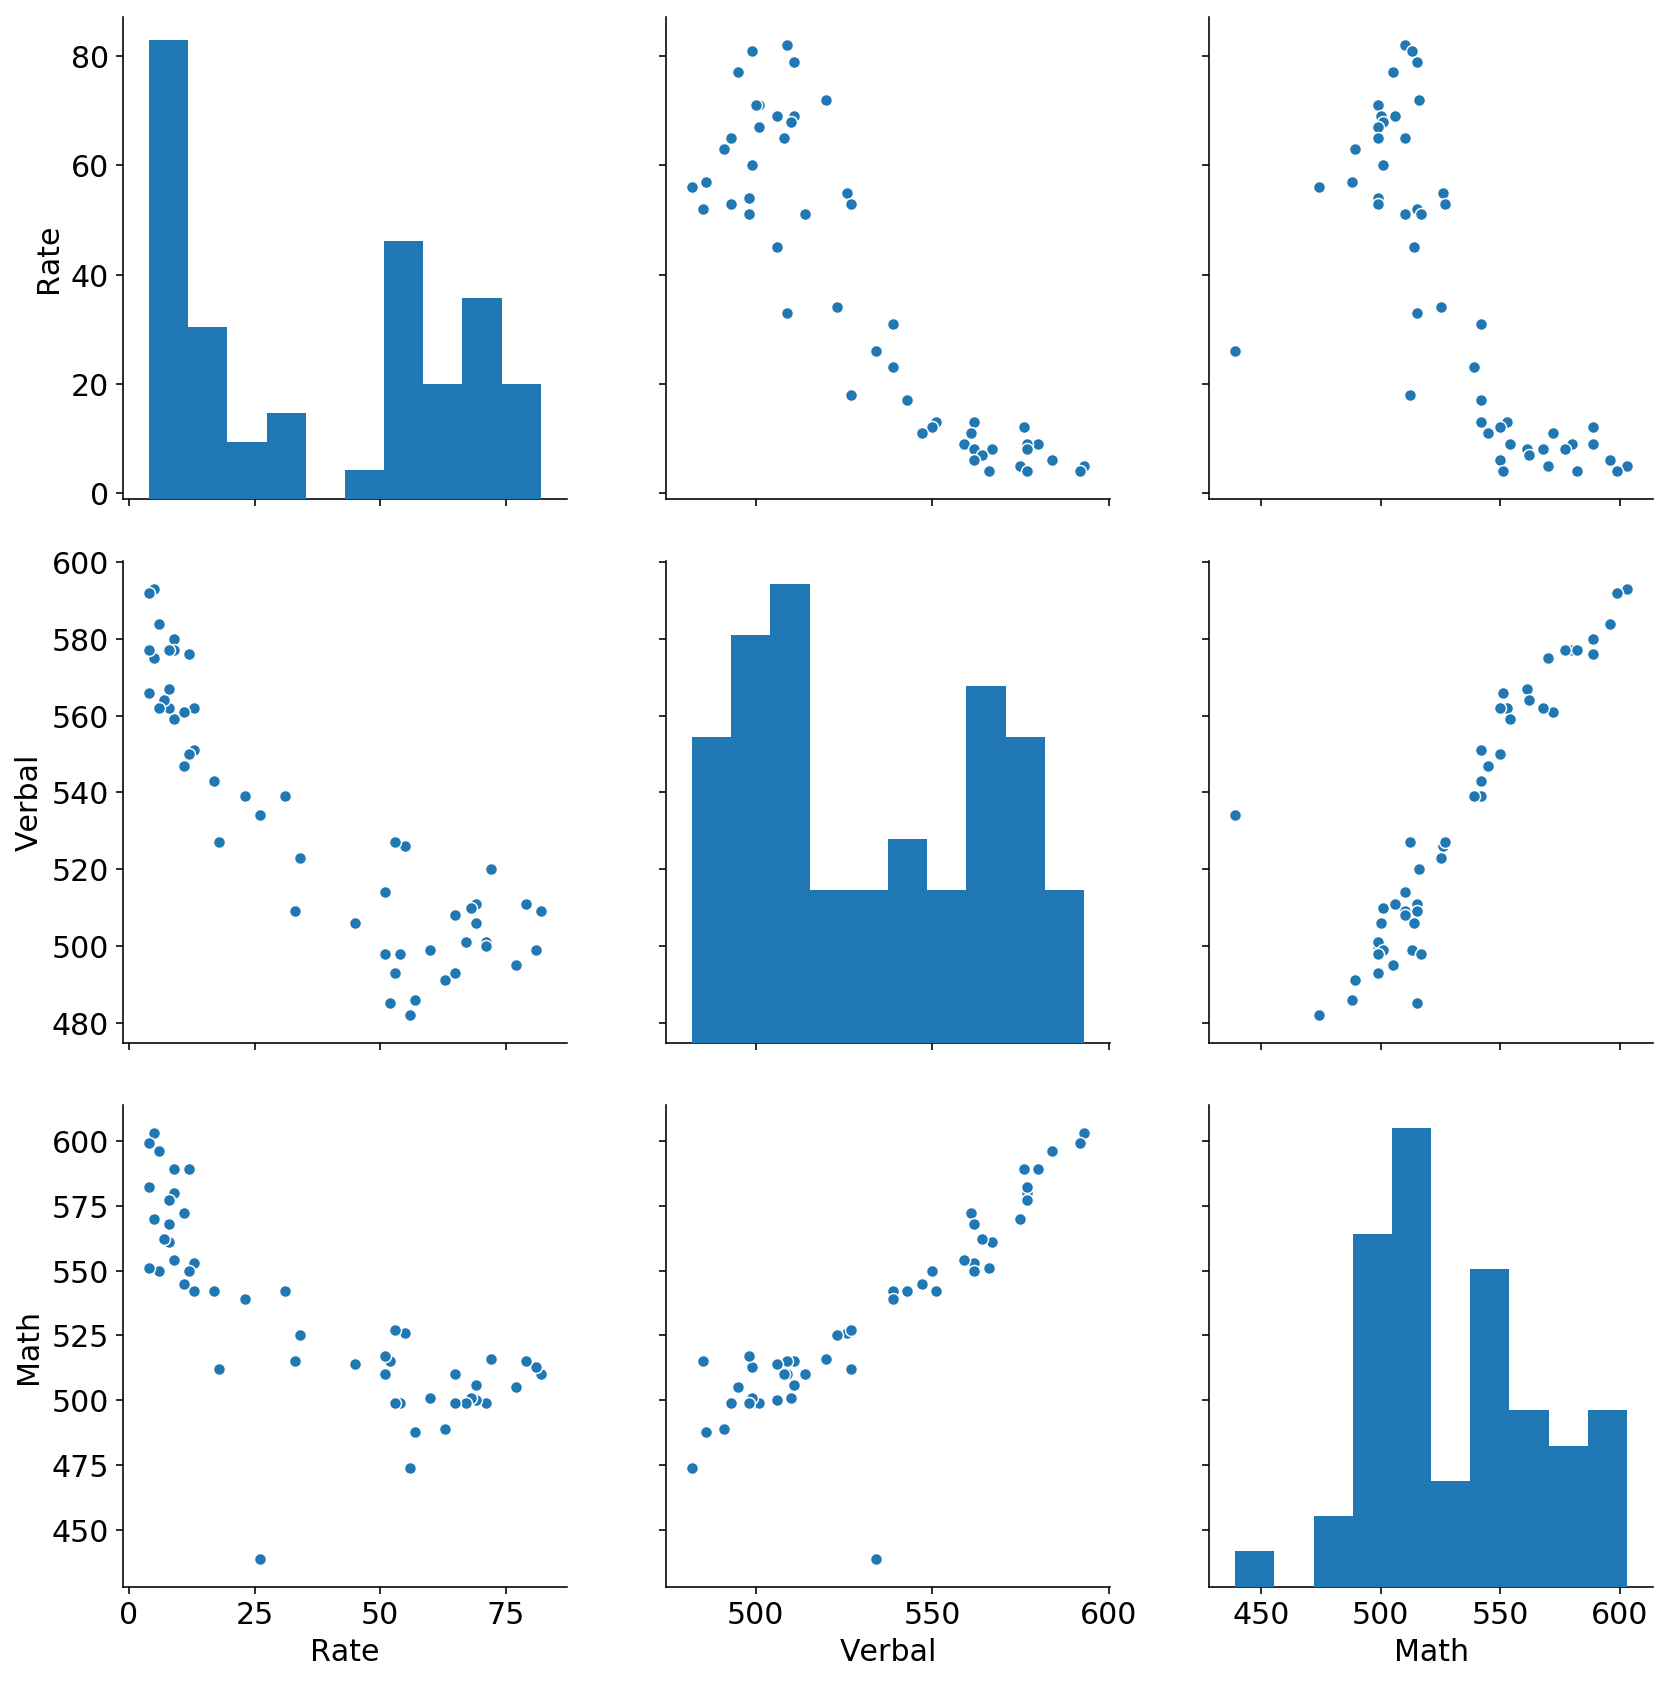

In [51]:
sns.pairplot(df, height = 4, aspect= 1)
plt.rc('axes', titlesize=15)  
plt.show()

Rate has a negative correlation with Math and Verbal


Verbal and Math have a positive correlation between them

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

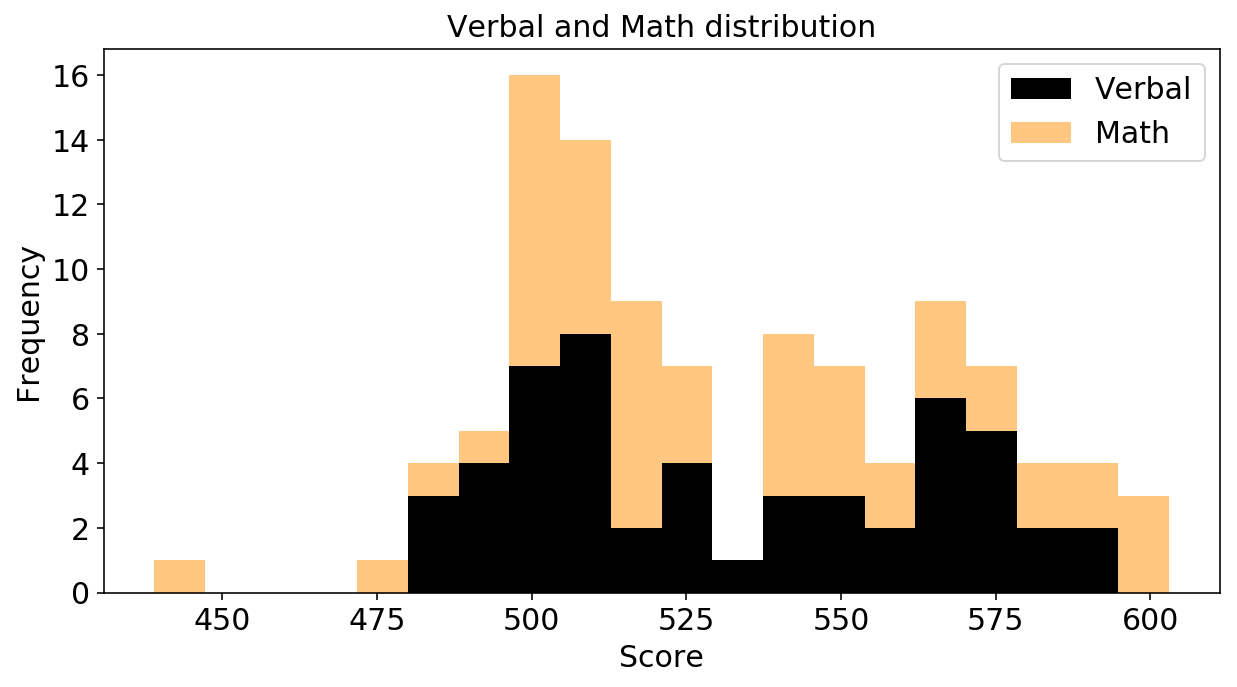

In [87]:
df[['Verbal','Math']].plot(kind='hist', stacked = True, figsize = (10,5), bins=20, 
                           title='Verbal and Math distribution',colormap='copper')
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

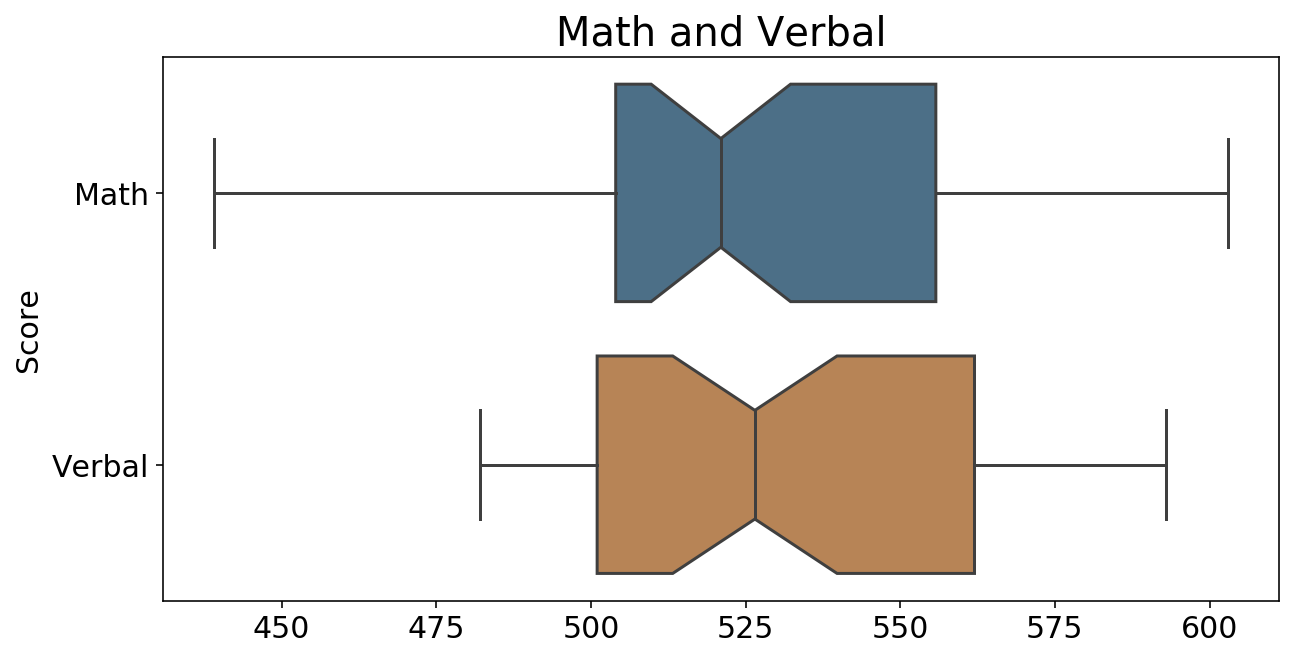

In [94]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

sns.boxplot(data=df[['Math','Verbal']], orient='h', 
            fliersize=8, notch=True,
            saturation=0.4, ax=ax)

ax.set_title('Math and Verbal', fontsize=20)
ax.set_ylabel('Score', fontsize=15)



plt.show()

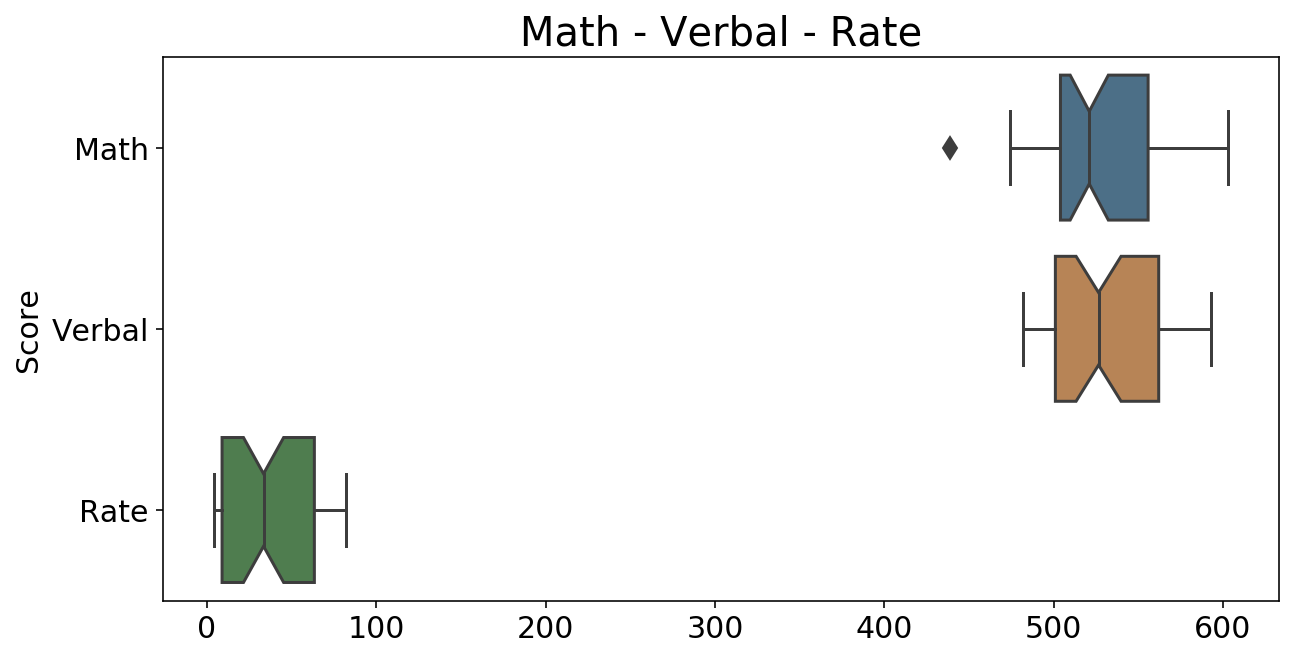

In [90]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

sns.boxplot(data=df[['Math','Verbal', 'Rate']], orient='h', 
            fliersize=8, notch=True,
            saturation=0.4, ax=ax, whis=1)

ax.set_title('Math - Verbal - Rate', fontsize=20)
ax.set_ylabel('Score', fontsize=15)



plt.show()

It doesn't make sense plot the 3 features together because 'Rate' is in a different scale than 'Math' and 'Verbal'.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [95]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [96]:
df_standardized = df[['Rate', 'Verbal', 'Math']].apply(lambda x : var_standardized(x))

In [97]:
df_standardized = pd.concat([df.State, df_standardized], axis=1)

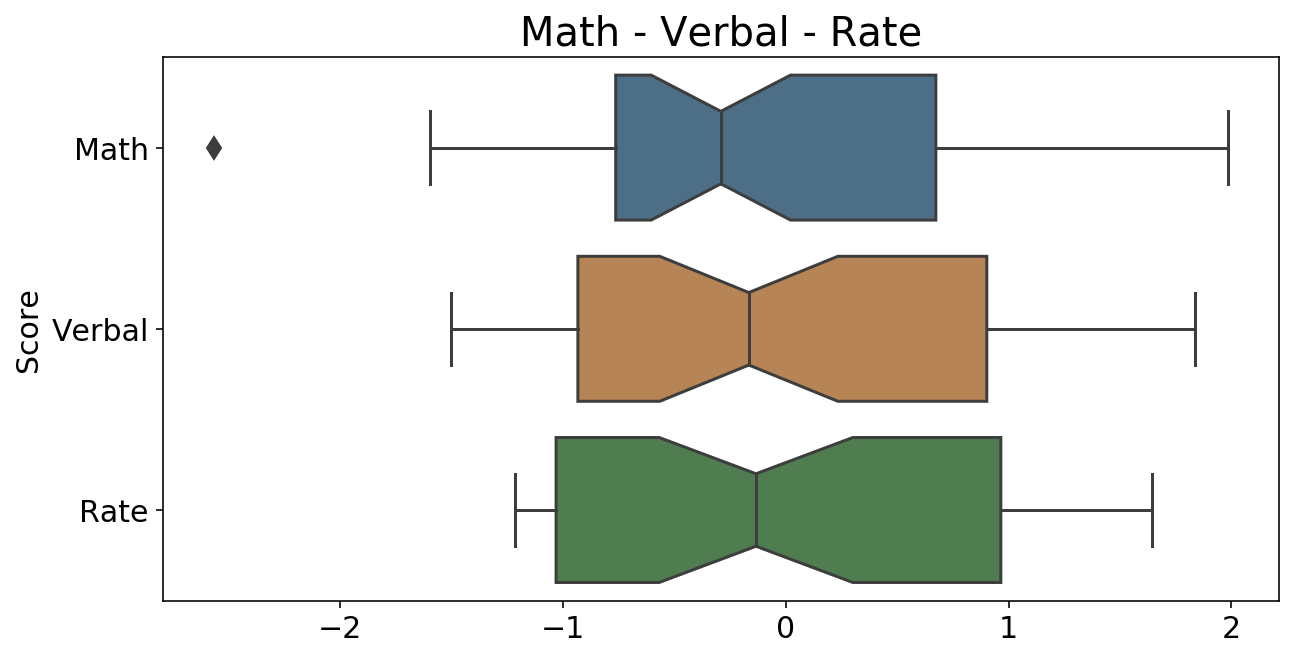

In [98]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

sns.boxplot(data=df_standardized[['Math','Verbal', 'Rate']], orient='h', 
            fliersize=8, notch=True,
            saturation=0.4, ax=ax, whis=1)

ax.set_title('Math - Verbal - Rate', fontsize=20)
ax.set_ylabel('Score', fontsize=15)



plt.show()

Math and Verbal data are in the same scale, but Rate is not. Before to plot them in the same plot we need to standardize them.
The boxplot are very usefull to catch immediately mean, median, mode and especially outliers.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [105]:
mask1 = (df.Verbal > df.Verbal.mean())

In [106]:
list_state_good_verbal = list(df[mask1]['State'])

In [107]:
list_state_good_verbal

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [108]:
len(list_state_good_verbal)

24

There are 24 States that scored higher than the mean for the Verbal score.
So the distribution has a positive skew

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [109]:
mask2 = (df.Verbal > df.Verbal.median())
list_verbal_state_median = list(df[mask2]['State'])

In [110]:
len(list_verbal_state_median)

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [111]:
df['Difference_Verbal_Math']= df.Verbal-df.Math

In [112]:
df.head()

,State,Rate,Verbal,Math,Difference_Verbal_Math
0,CT,82.0,509.0,510.0,-1.0
1,NJ,81.0,499.0,513.0,-14.0
2,MA,79.0,511.0,515.0,-4.0
3,NY,77.0,495.0,505.0,-10.0
4,NH,72.0,520.0,516.0,4.0


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [119]:
df_ten1 = df.sort_values('Difference_Verbal_Math', ascending=True).iloc[:10,:]
print(df_ten1.head(3))

   State  Rate  Verbal   Math  Difference_Verbal_Math
21    HI  52.0   485.0  515.0                   -30.0
23    CA  51.0   498.0  517.0                   -19.0
1     NJ  81.0   499.0  513.0                   -14.0


In [121]:
df_ten2 = df.sort_values('Difference_Verbal_Math', ascending = False).iloc[:10,:]
print(df_ten2.head(3))

   State  Rate  Verbal   Math  Difference_Verbal_Math
27    OH  26.0   534.0  439.0                    95.0
50    MS   4.0   566.0  551.0                    15.0
29    WV  18.0   527.0  512.0                    15.0


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [127]:
from matplotlib.colors import ListedColormap

In [122]:
corr = df[['Rate','Verbal', 'Math']].corr()
corr

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


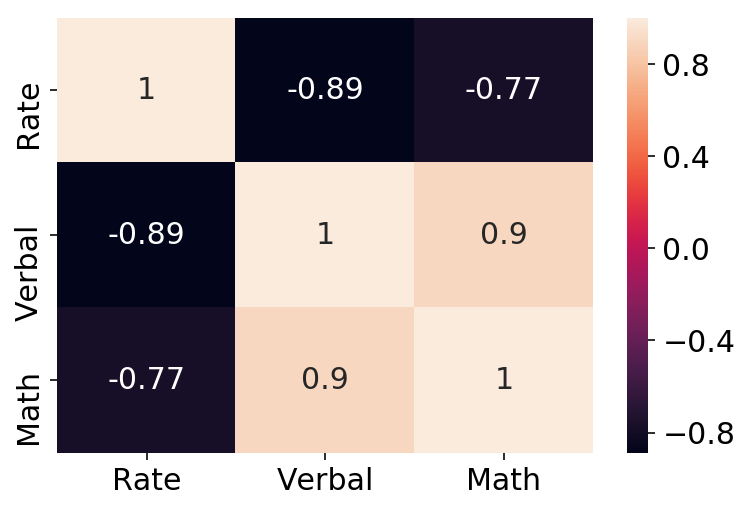

In [151]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

The correlation Matrix confirm what we said and saw before

Rate has a negative correlation with Math and Verbal

Verbal and Math have a positive correlation between them

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [136]:
df.describe()

,Rate,Verbal,Math,Difference_Verbal_Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


Count = Number of the rows = number of data (51 like the states in this case) plus the total

Mean = Mean for each columns

Std = Standard Deviation for each column

Min = Minimum for each column

25% - 75 % = First and third quantile (25% = Median between Min-Median; 75% = Median between Median-Max)

50% = Median

Max = Maximum for each column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [1181]:
cov = df[['Rate','Verbal', 'Math']].cov()
cov

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


1 - Correlation is adimensional, and so without unit
The covariance keep the same dimension of the feature. Correlation is in a range of [-1,1], while the Covariance can have others value, sometimes very big.
2 - Correlation is the Covariance divided for the moltiplication of the each standard deviation's feature (Corr = Cov / std_x*std_y)
3 - The Correlation is easier to analyze because is : -1 <= value <= 1

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [137]:
drug = pd.read_csv('drug-use-by-age.csv')

In [138]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [139]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [140]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [141]:
drug = drug.applymap(lambda x: np.nan if x=='-' else x) #First thing I want to put actually missing value where I have the missing value '-'


In [142]:
drug = drug.fillna(value=0.0)

In [143]:
drug.iloc[:,2:] = drug.iloc[:,2:].apply(pd.to_numeric, axis=1)


Changing the missing value with 0 as the missing value are only in some frequency columns for the age where no-one is using that drug

In [144]:
drug['age'] = drug['age'].str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)


All the columns now are numerical data

Frequency and use could give us different informations, so I will split the dataframe in only use and frequency

In [145]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [146]:
list_frequency = ['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 
                  'heroin-frequency', 'hallucinogen-frequency', 'inhalant-frequency','pain-releiver-frequency', 
                  'oxycontin-frequency', 'tranquilizer-frequency','stimulant-frequency', 'meth-frequency',
                  'sedative-frequency' ]

In [147]:
list_use = ['alcohol-use', 'marijuana-use','cocaine-use', 'crack-use','heroin-use', 'hallucinogen-use',
            'inhalant-use', 'pain-releiver-use', 'oxycontin-use','tranquilizer-use', 'stimulant-use', 
            'meth-use', 'sedative-use']

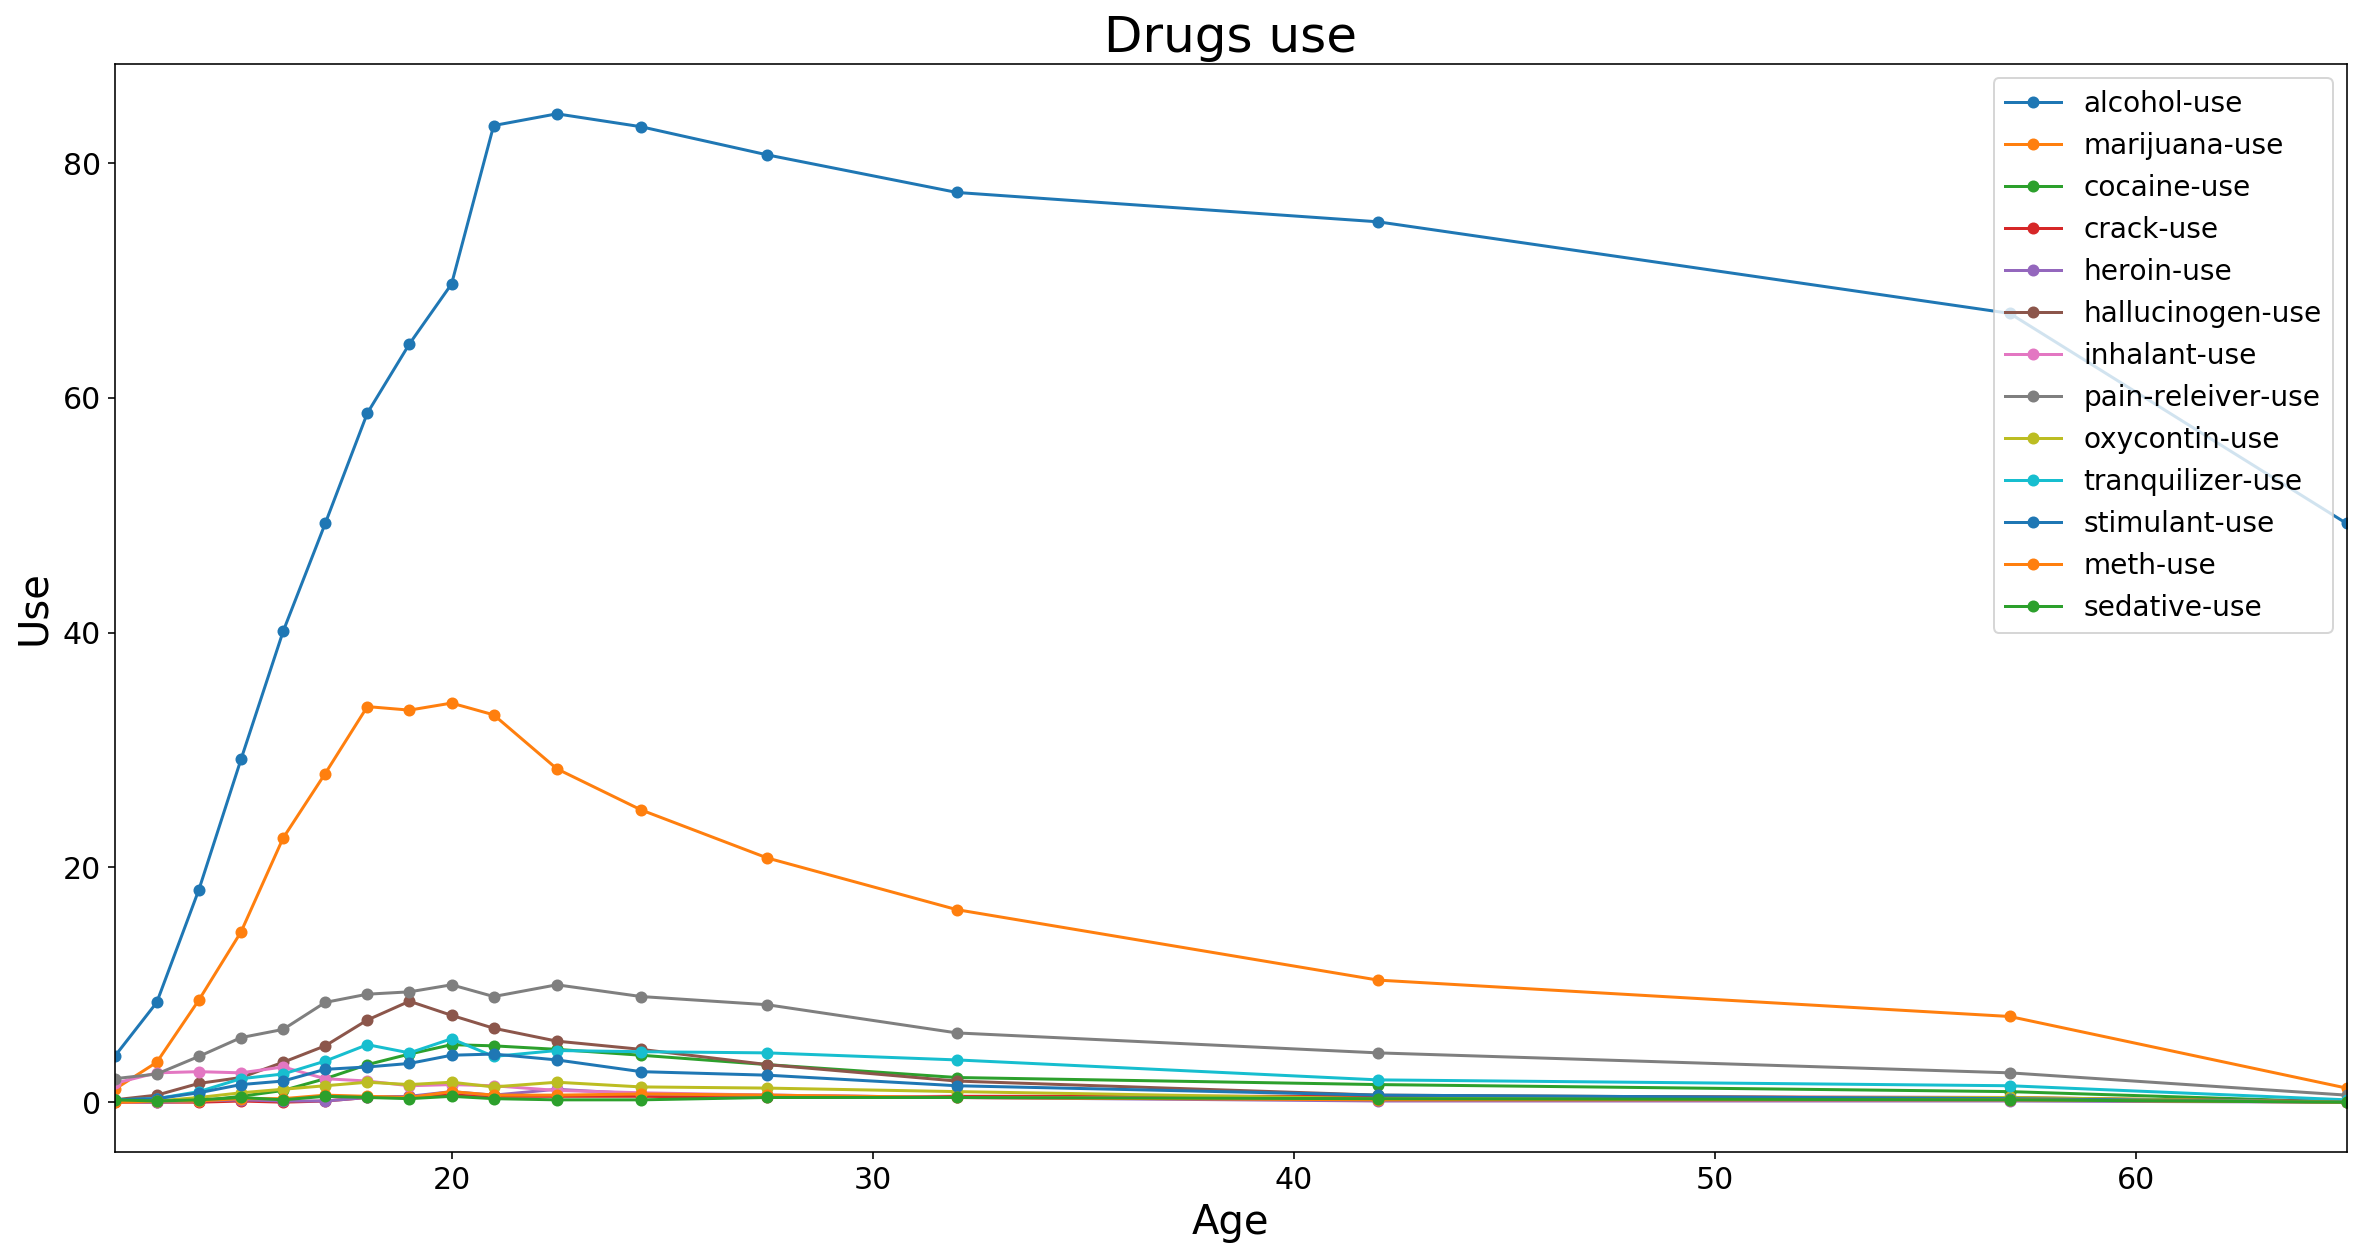

In [180]:
ax = drug.plot(x="age", y=list_use, marker = '.', markersize=10, kind='line', 
               figsize=(20,10))
ax.set_title('Drugs use', fontsize=25)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Use', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

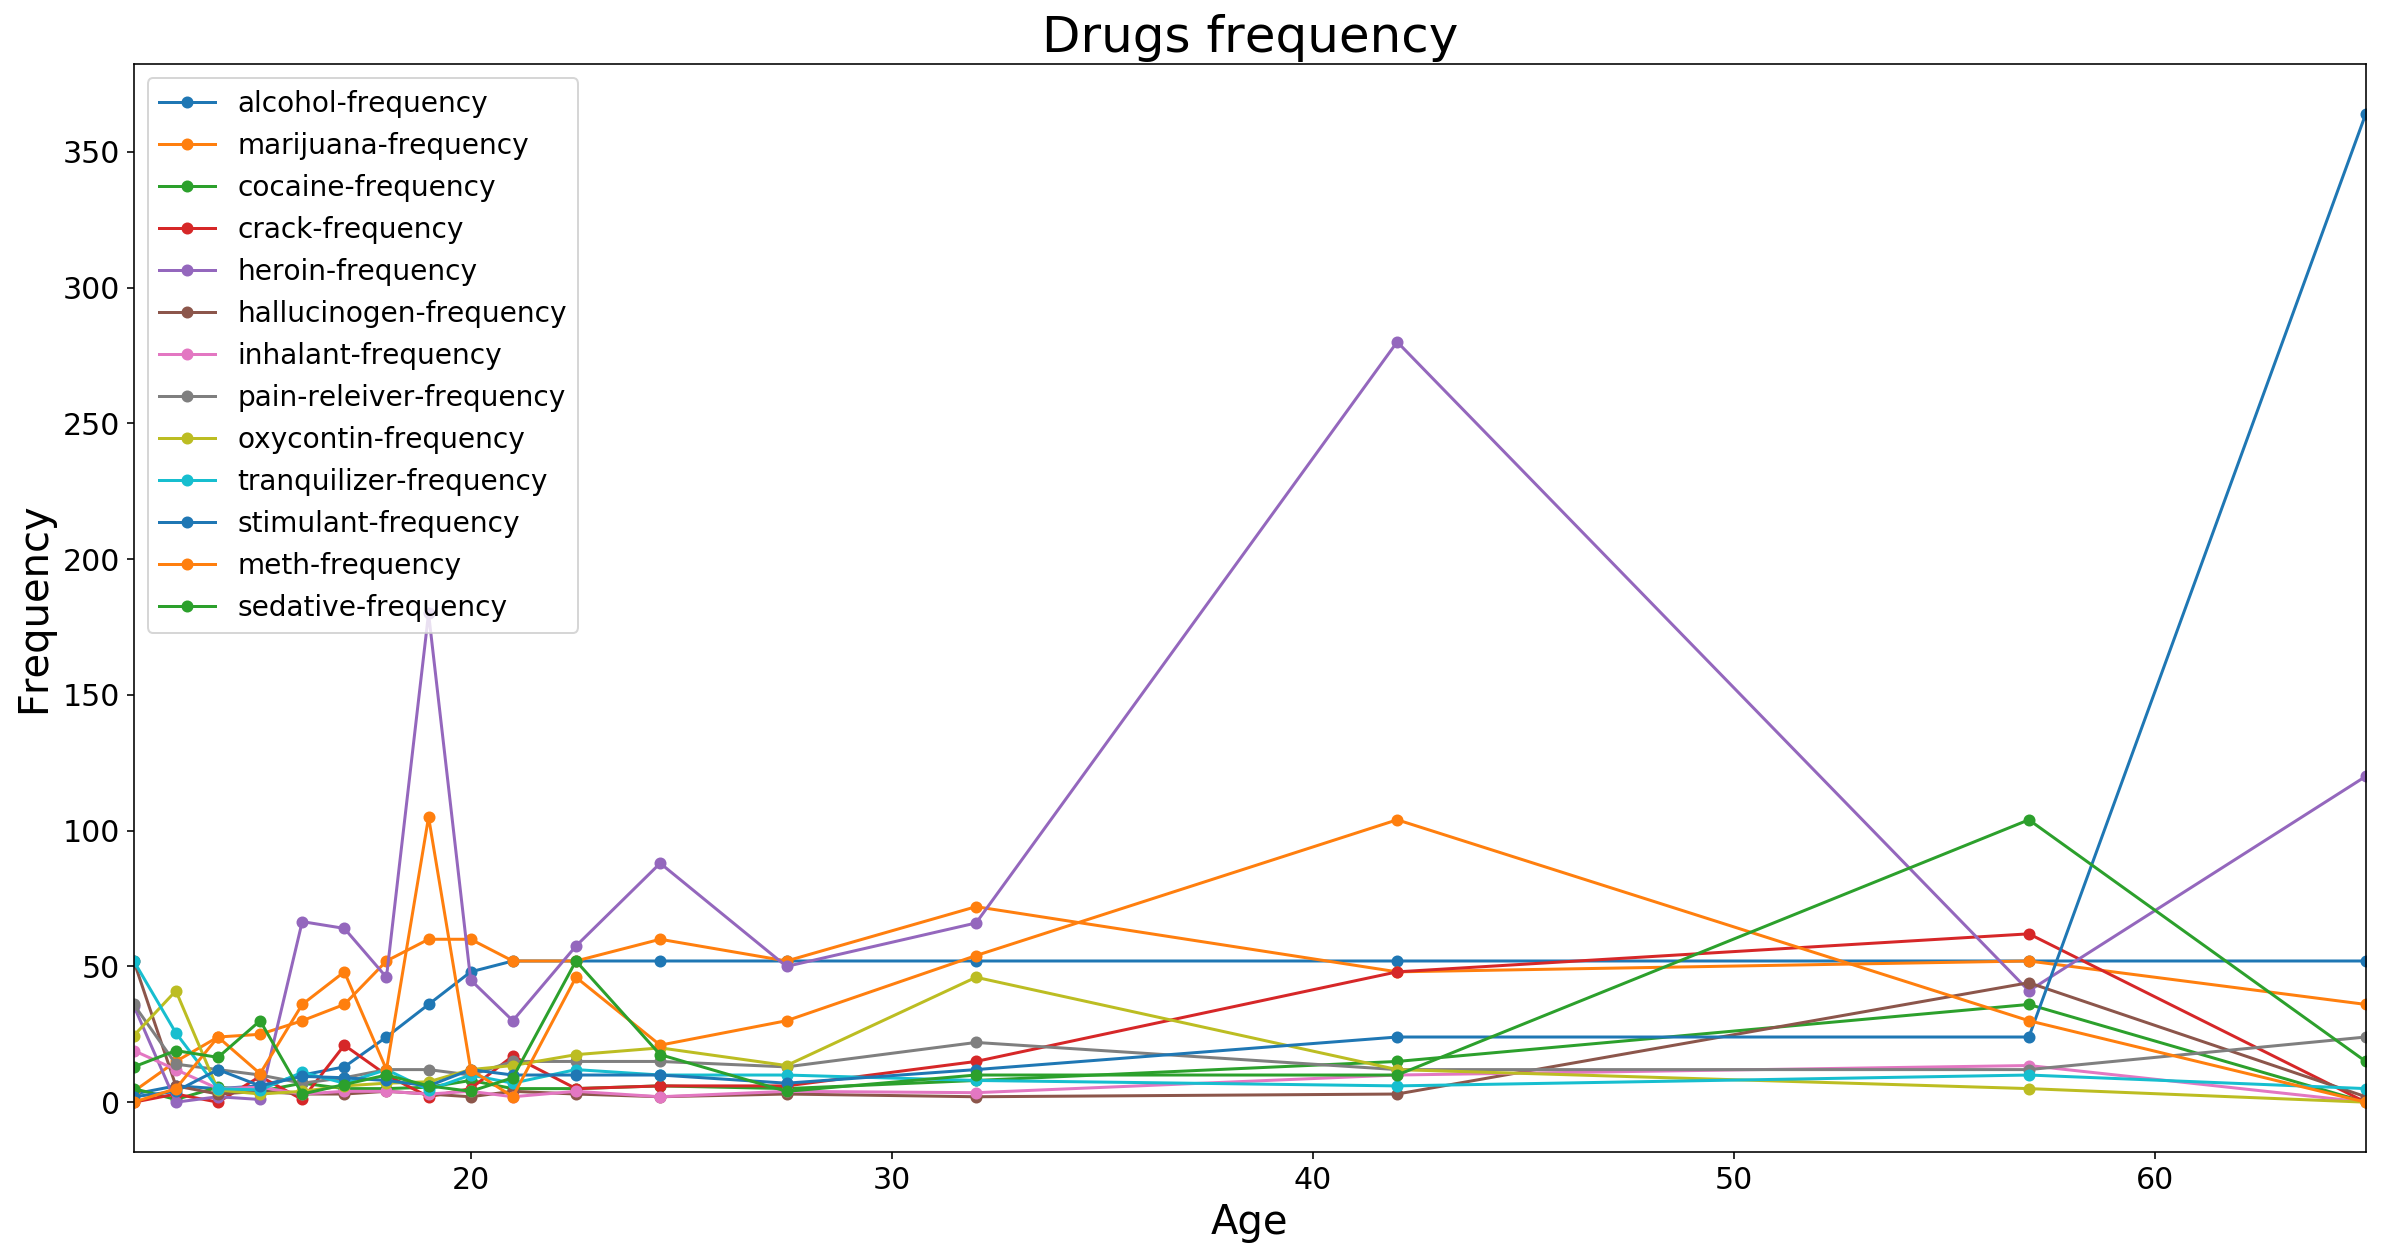

In [181]:
ax = drug.plot(x="age", y=list_frequency, marker = '.', markersize=10, kind='line', 
               figsize=(20,10))
ax.set_title('Drugs frequency', fontsize=25)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.legend(fontsize=14, loc=2)
plt.show()

Alcohol and Marijuana for several reason (Price, easy to find, considered light drugs) are way more popular than other substances. Could be more interesting plot without their data.

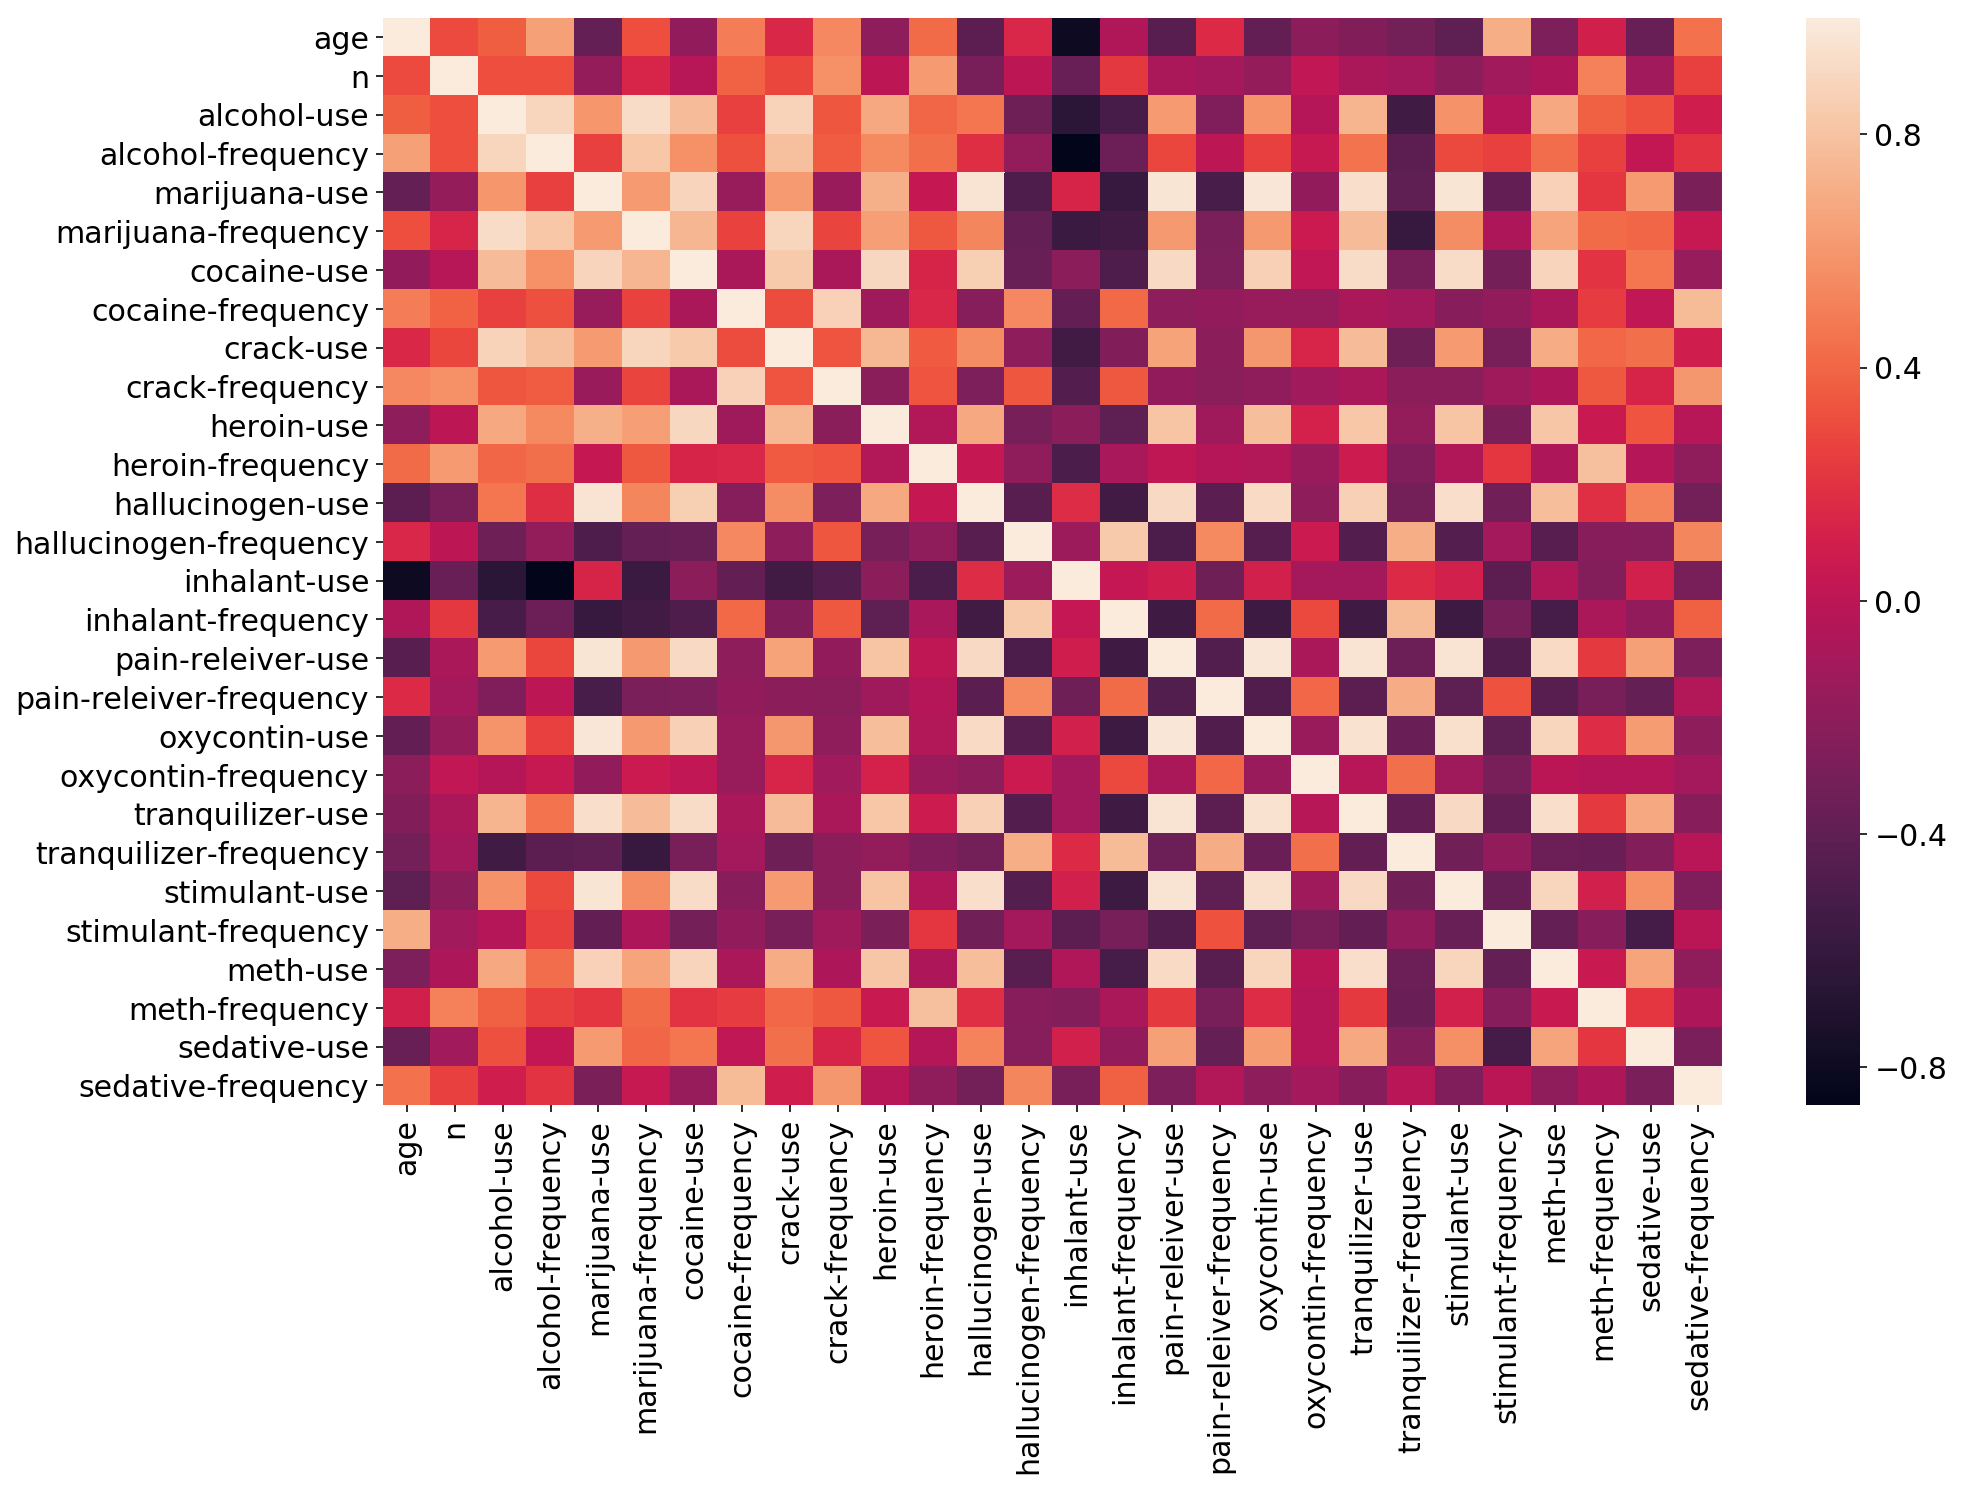

In [186]:
fig = plt.figure(figsize=(15,10))
drug.corr()
sns.heatmap(drug.corr())

The heatmap looks a bit confusing but we could see something interresting like a cross. It corrispond at the Inhalate values

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [187]:
drug_use = drug[list_use]

In [188]:
drug_use.drop(['alcohol-use', 'marijuana-use'], 1, inplace=True)

In [189]:
drug_frequency = drug[list_frequency]

In [190]:
drug_frequency.drop(['alcohol-frequency', 'marijuana-frequency'], 1, inplace=True)

In [191]:
list_use_hard = list_use[2:]
list_frequency_hard = list_frequency[2:]

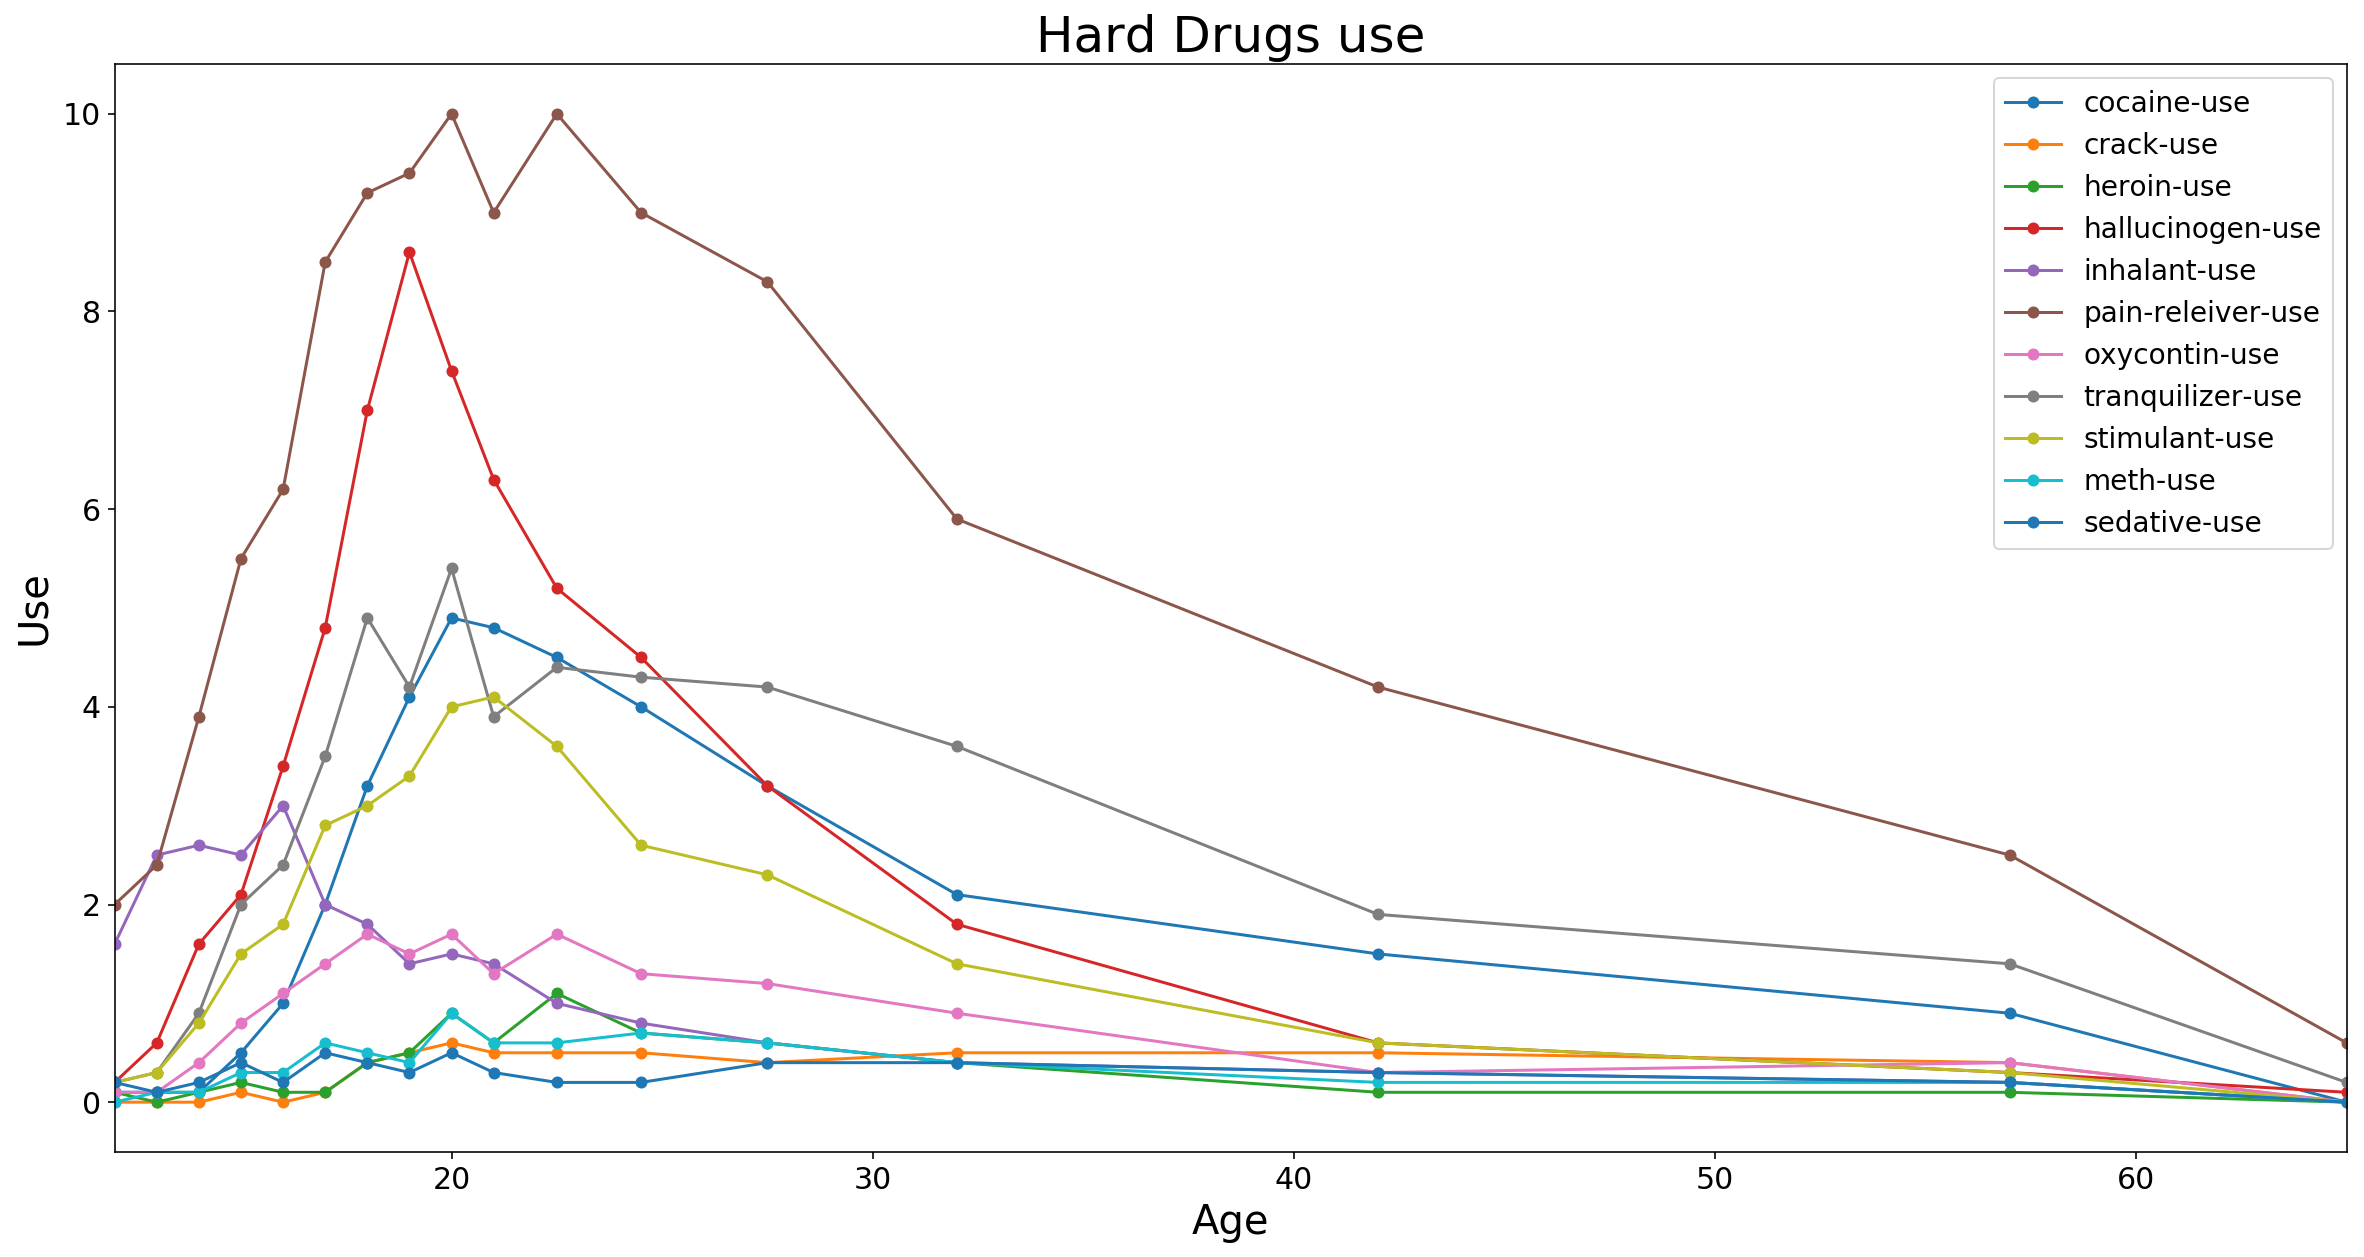

In [195]:
ax = drug.plot(x="age", y=list_use_hard, marker = '.', markersize=10, kind='line', 
               figsize=(20,10))
ax.set_title('Hard Drugs use', fontsize=25)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Use', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

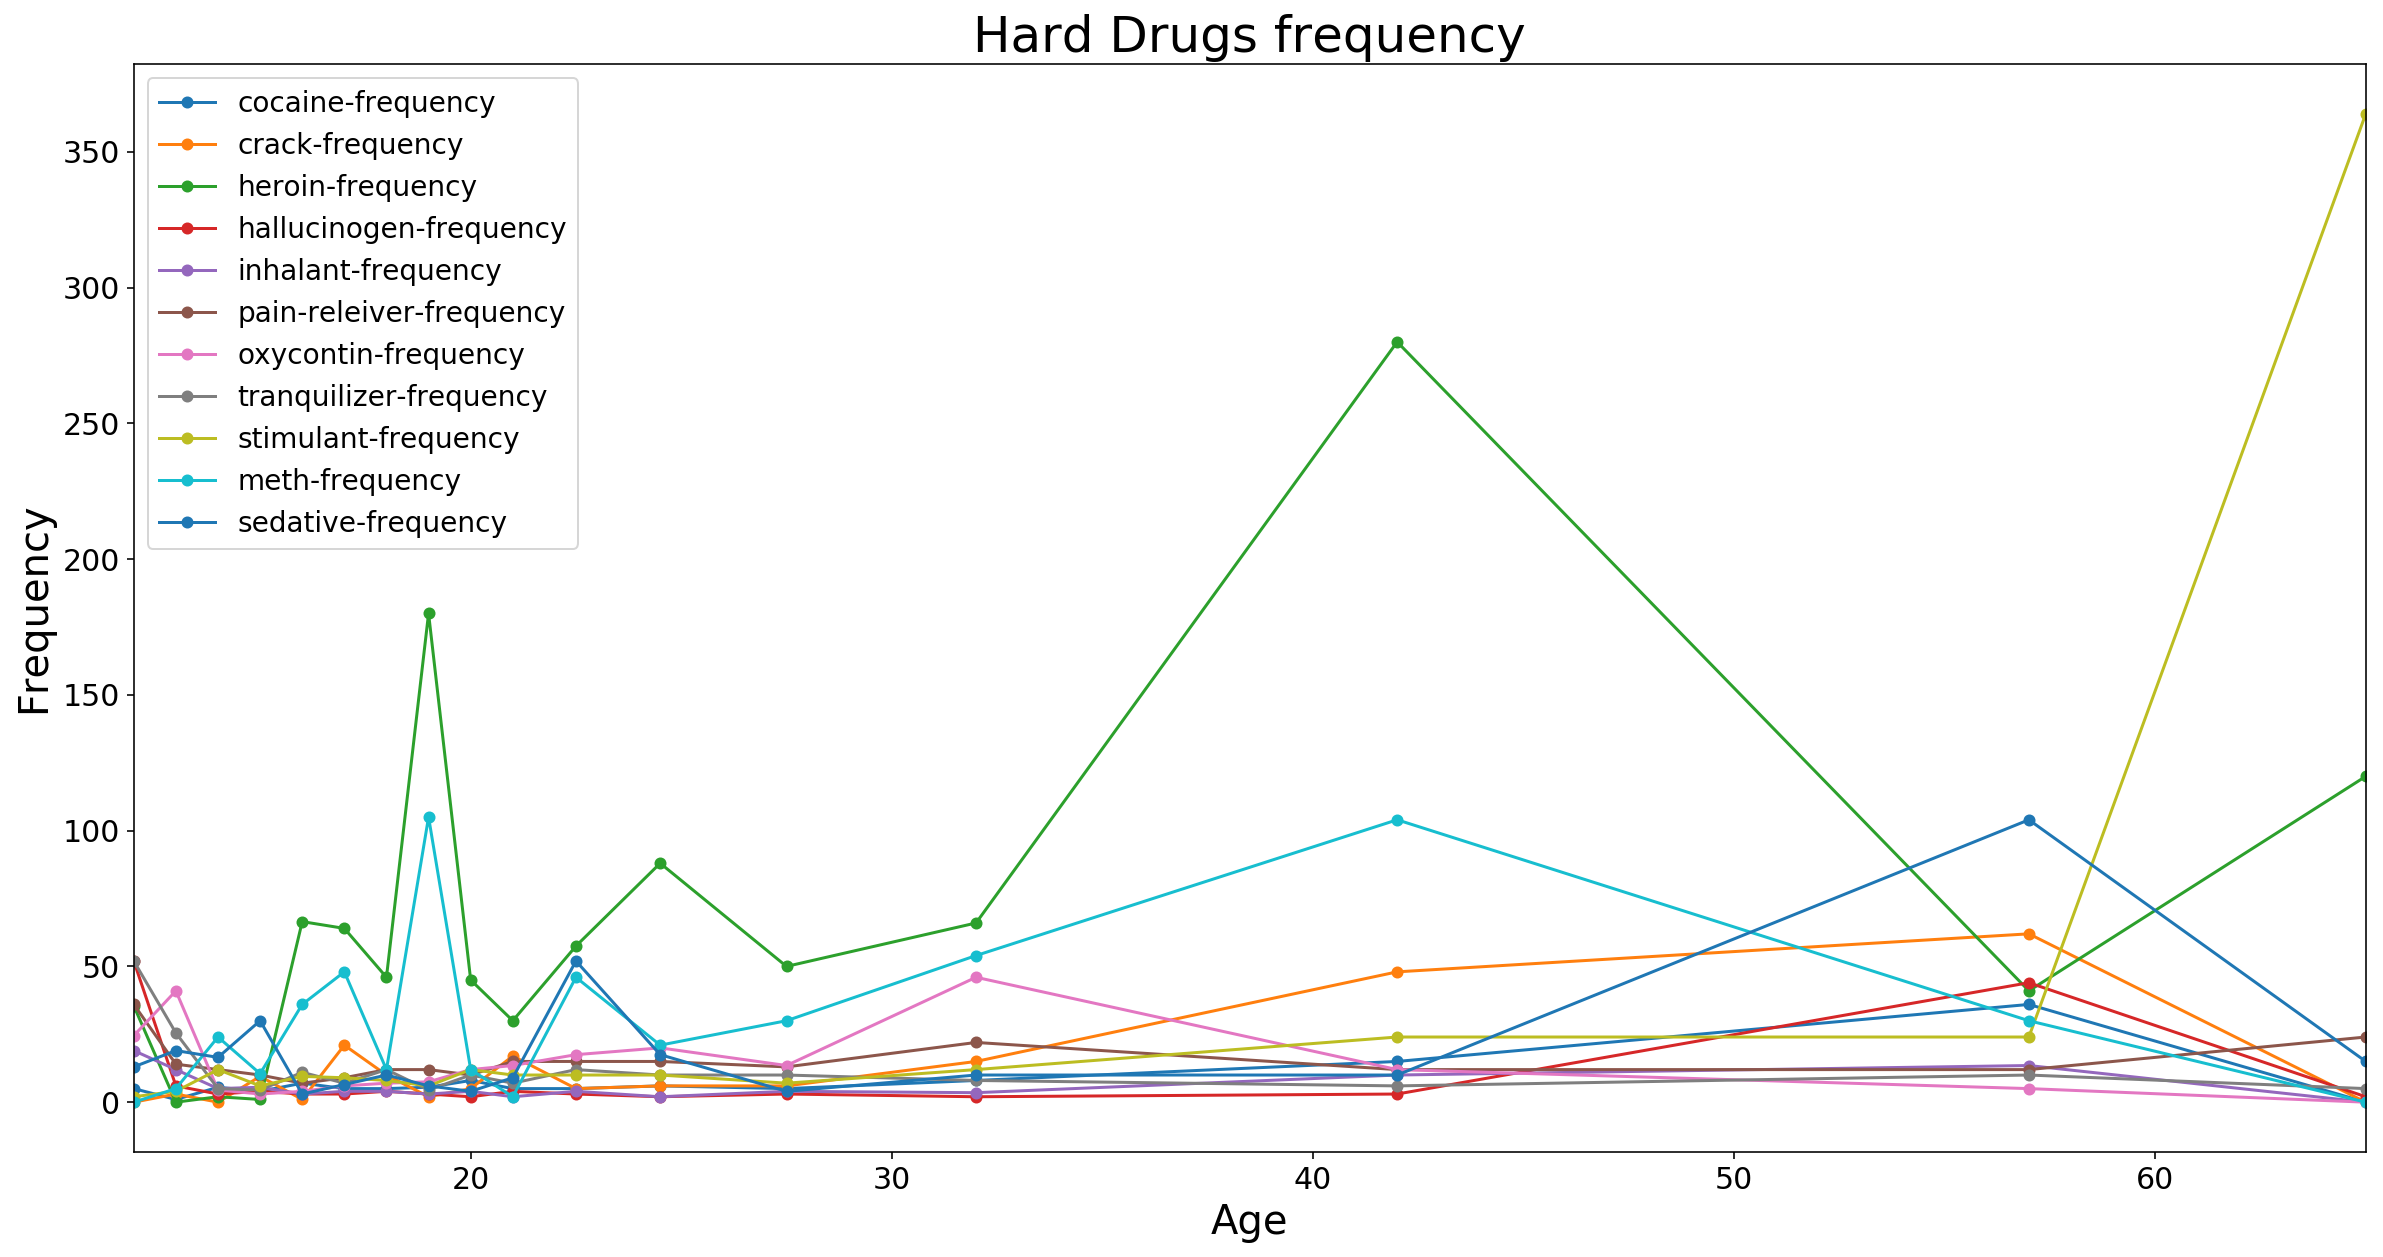

In [198]:
ax = drug.plot(x="age", y=list_frequency_hard, marker = '.', markersize=10, kind='line', 
               figsize=(20,10))
ax.set_title('Hard Drugs frequency', fontsize=25)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.legend(fontsize=14, loc=2)
plt.show()

Interesting to see who is taking the lead, by age, after we dropped alcohol and marijuana


In [199]:
drug_use['age'] = drug['age']

drug_frequency['age'] = drug['age']

In [200]:
drug_use.set_index('age', inplace=True)
drug_frequency.set_index('age', inplace=True)

In [201]:
drug_use['common drug'] = drug_use.idxmax(axis=1)
drug_frequency['common drug'] = drug_frequency.idxmax(axis=1)

In [202]:
drug_use[['common drug']]


,common drug
age,
12.0,pain-releiver-use
13.0,inhalant-use
14.0,pain-releiver-use
15.0,pain-releiver-use
16.0,pain-releiver-use
17.0,pain-releiver-use
18.0,pain-releiver-use
19.0,pain-releiver-use
20.0,pain-releiver-use


In [203]:
drug_frequency[['common drug']]

,common drug
age,
12.0,hallucinogen-frequency
13.0,oxycontin-frequency
14.0,meth-frequency
15.0,sedative-frequency
16.0,heroin-frequency
17.0,heroin-frequency
18.0,heroin-frequency
19.0,heroin-frequency
20.0,heroin-frequency


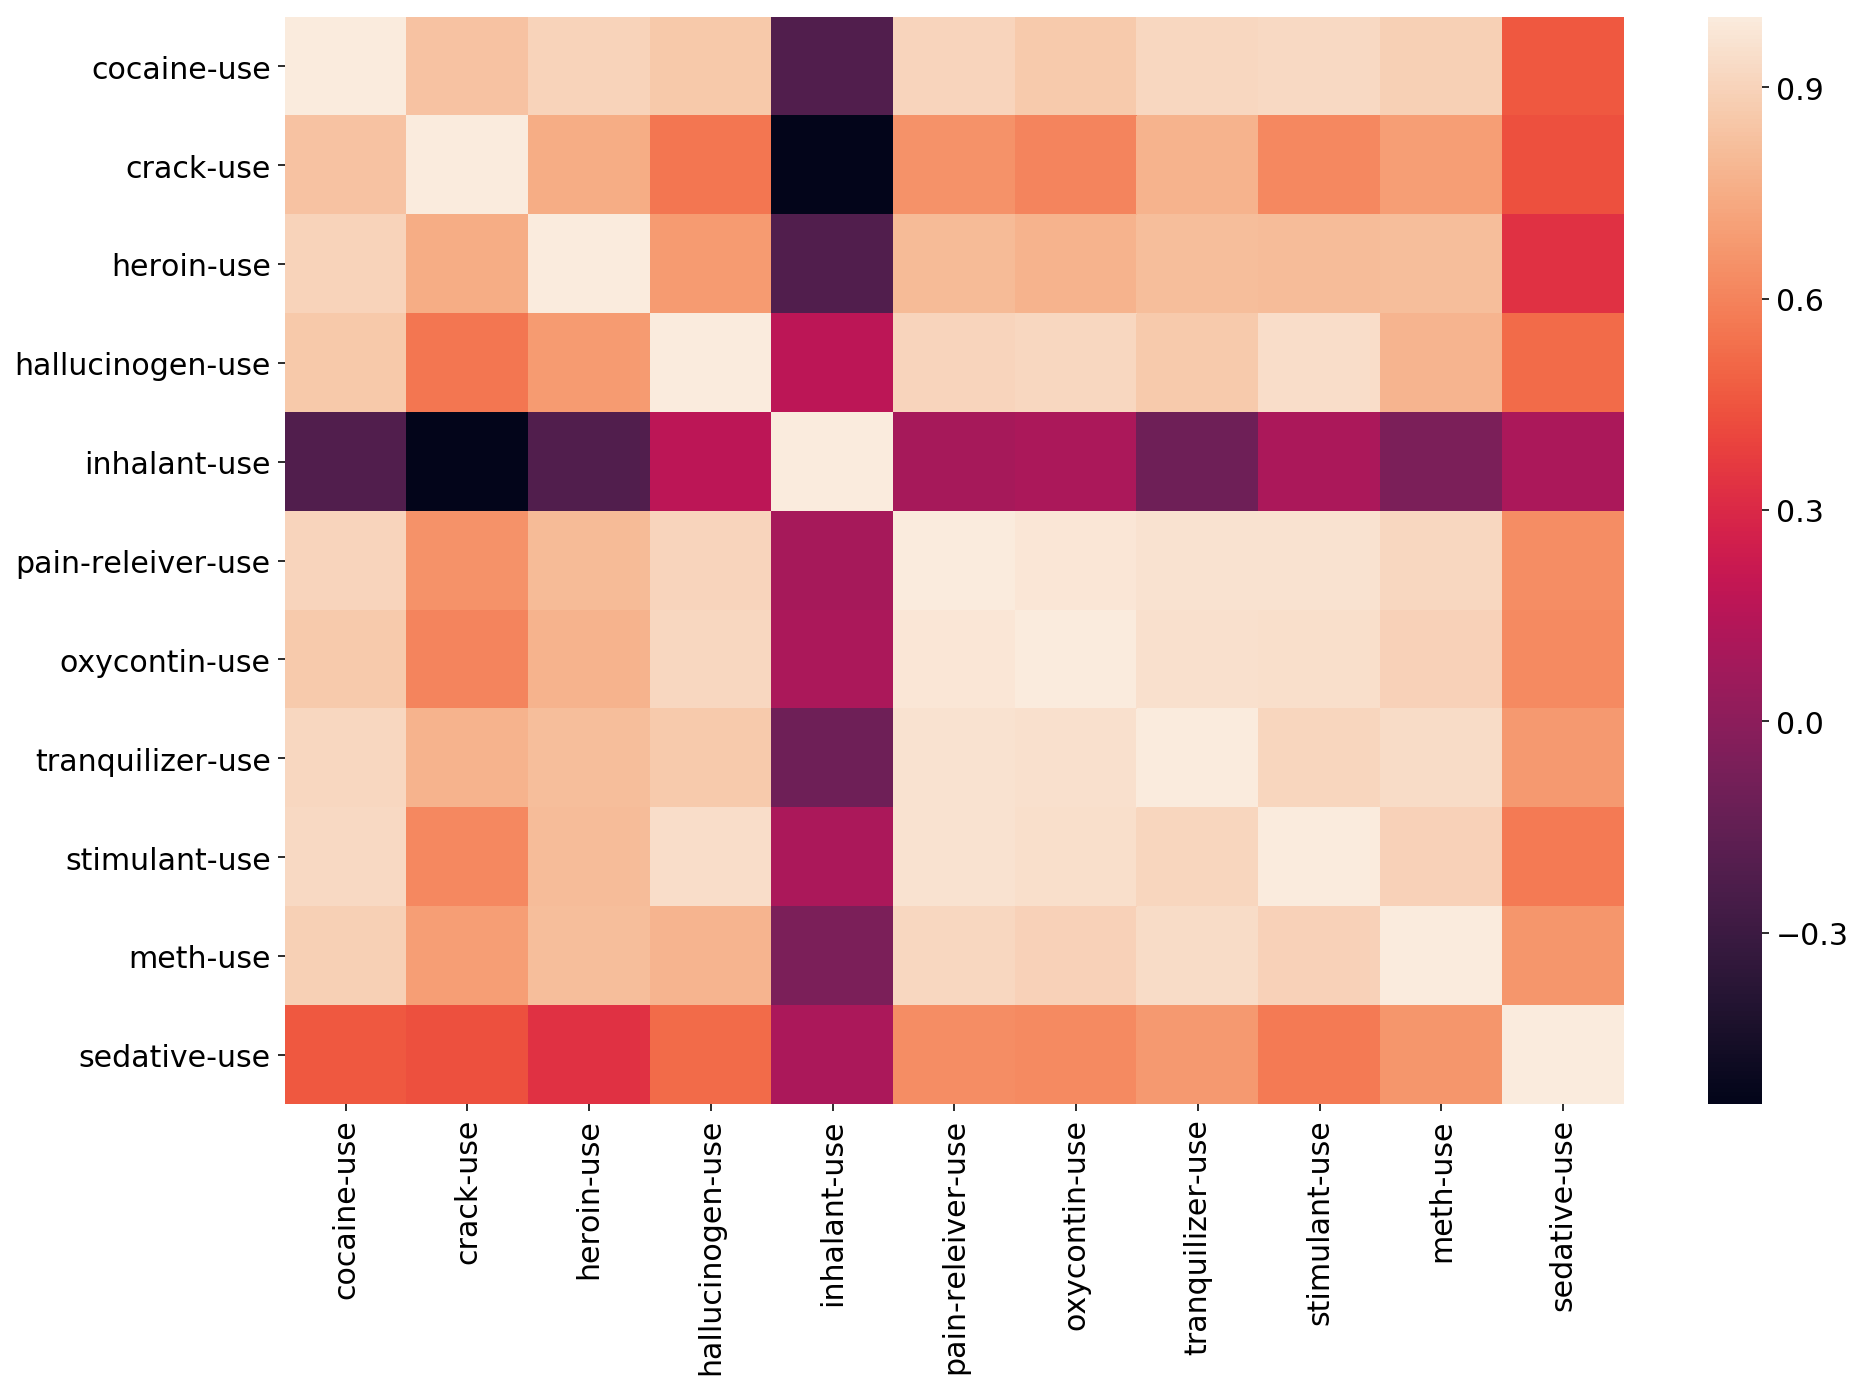

In [206]:
fig = plt.figure(figsize=(15,10))
drug_use.corr()
sns.heatmap(drug_use.corr())

The cross we saw before became very clear if we consider just the use column/dataframe.
It show a strong negative correlation between Inhalant and any other substance.

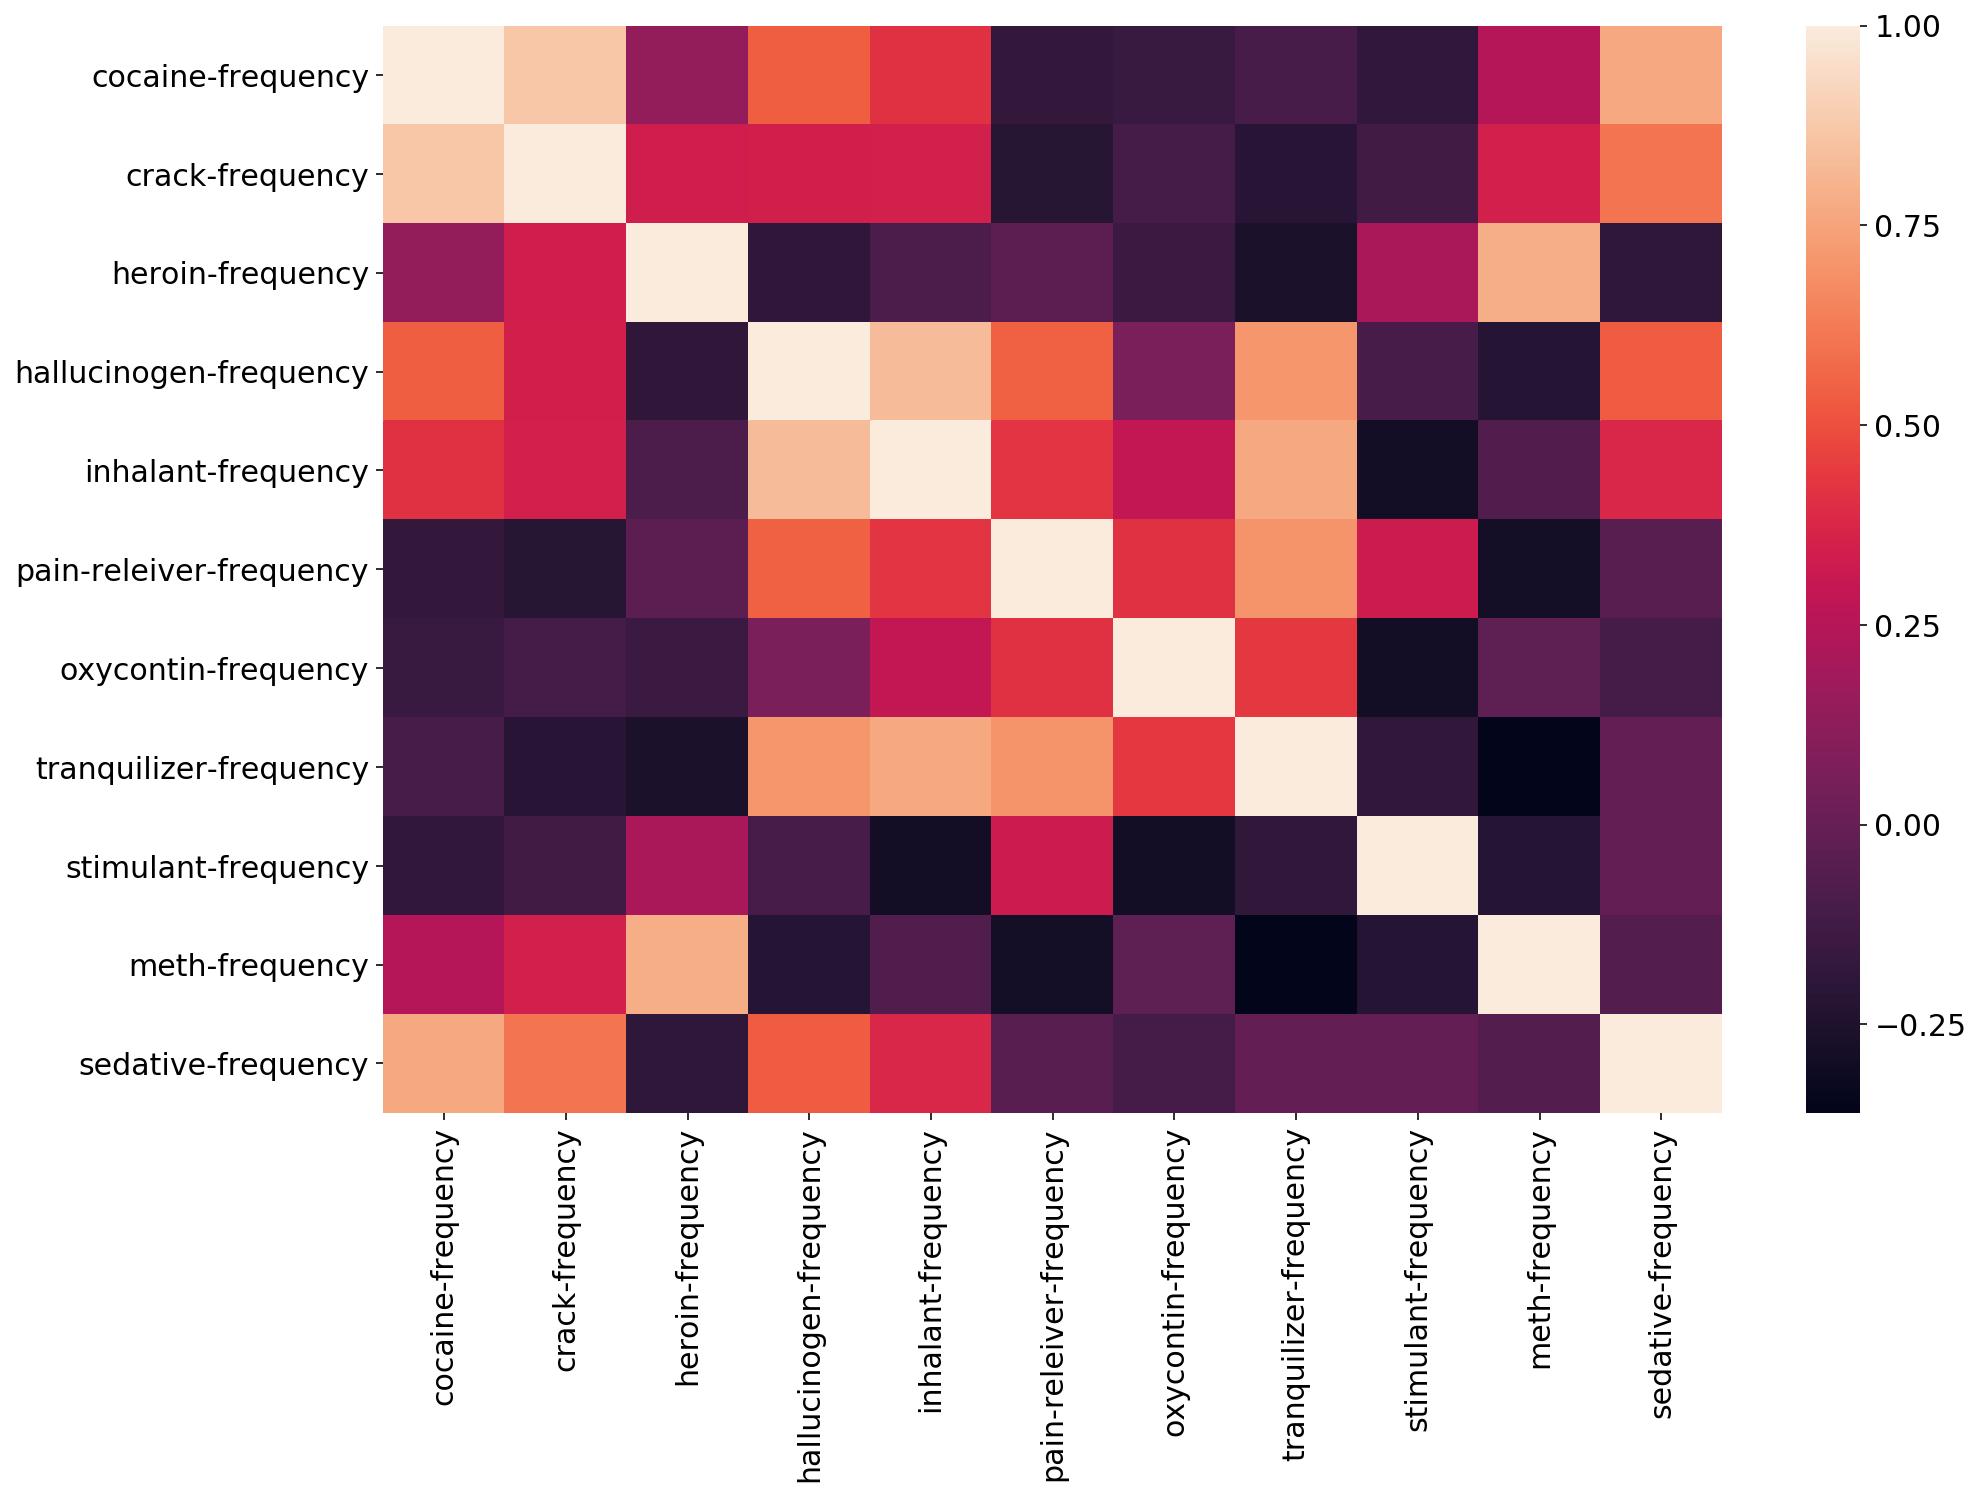

In [207]:
fig = plt.figure(figsize=(15,10))
drug_frequency.corr()
sns.heatmap(drug_frequency.corr())

The frequency heatmap doesn't look very helpful

In [208]:
drug_frequency.mean() 

cocaine-frequency           7.411765
crack-frequency            12.382353
heroin-frequency           68.970588
hallucinogen-frequency      8.411765
inhalant-frequency          5.794118
pain-releiver-frequency    14.705882
oxycontin-frequency        13.941176
tranquilizer-frequency     11.735294
stimulant-frequency        31.147059
meth-frequency             31.735294
sedative-frequency         19.382353
dtype: float64

We can have an idea about how some drugs are more addictive than others from the mean of frequency. Althought some of them are consequence of "outliers" data as we can see in the boxplot. 

### QUALITATIVE CONSIDERATION BEFORE THE HYPOTESIS IN GENERAL

The Dataset contain some missing values. These values are always in the frequency column and corrispond always to a 0% of the use of the same drug. Technically is not "missing", but "there is no" value. We could discuss if we should put 0 or the mean of the column, at the end the answer is in our goal. Since there is no value we should act to not contaminate the real data. 
- The missing value are actually a string '-', so every cell of that column became a string as well. We need to change '-' with a normal Nan so we can manipulate the data as float
- Frequency and Use can tell us different things, so could be usefull to separate data in 2 database.
- It is pretty clear from the first look, and a general plot that alcohol and marijuana present value too big to be compared with the others. The reason can be pretty obvious and it is antropological and practical (alcohol is legal and part of the common use, marijuana is considered a light drug, easy to find and to grow). Also it is not specified the quantity, but for low use
I could find interesting a database without these 2 features.
- The frequency data could actually tell us how strong the addiction for that kind of drug could be. In fact the mean of opiates (heroin and oxycontin is higher than others)
- With great surprise, or not, the substance most used (after alcohol and marijuana) is pain-reliever. The surprise is that this is true at any age except 13, where there is the biggest surprise of the dataset, Inahalant.
- Inhalant have a very weird behivoir and I will analysis deeply in the next session
-The frequency dataset is not uniform, a person with a very strong addiction could change completely the data. The clearest example of this is stimulant frequency. 
Stimulant use for more than 65 year old  is 0% but it got a median (frequency) of 364 times in 1 year. How is that possible? Most likey there was only one person to use the stimulant so the percentage was too low to keep it in1 decimal and the median(mean and mode) is obtained from only one value, 364. I almost sure of this as the number show that the person is taking the stimulant daily, probalby as prescription from the doctor.
- Interesting also the data for people around 50-60. Apart alcohol and marijuana, pain reliever as I said is the third, traquilizer is the fourth, last drug that has a percentage more than 1%. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


Correlation, value above the mean  in the age. The case of the Inhalant

HYPOTESIS - QUESTIONS

Pain-releiver is the most common drug after alcohol and marijuana in almost any range of age.
We want to group the data in bigger range of age, especially for the younger age since we have a data for every year.
The cross we saw on the heatmap about the Inhalant value shows a strong negative correlation between Inhalant and other drugs. 

For 18 < age < 35 I am expected to see the mean of the usage bigger than the mean overall for basically any drug. Not for Inhalant.
For age < 18 (under age) I am expecting to see the mean way bigger than the total mean for Inhalant, while I am expecting to see the opposite for any other drug.
This could demostrate what could be the biggest problem in society for very young people / kids, about drug.


In [209]:
drug_use.reset_index(inplace = True)

In [210]:
# Code

mask1 = (drug_use.age<18)

mask2 = (drug_use.age>=18) & (drug_use.age<25)

mask3 = (drug_use.age>=25) & (drug_use.age<=35)

mask4 = (drug_use.age>35) & (drug_use.age<=50)

mask5 = (drug_use.age>50) & (drug_use.age<65)

mask6 = drug_use.age>=65



In [219]:
new_def = {
    18:round(drug_use[mask1].mean(), 2),
    25:round(drug_use[mask2].mean(), 2), 
    35:round(drug_use[mask3].mean(), 2), 
    45:round(drug_use[mask4].mean(), 2), 
    60:round(drug_use[mask5].mean(), 2), 
    65:round(drug_use[mask6].mean(), 2), 
    'Tot': round(drug_use.mean(), 2) }
data_df = pd.DataFrame(new_def)
data_df

,18,25,35,45,60,65,Tot
age,14.50,20.83,29.75,42.0,57.0,65.0,25.62
cocaine-use,0.63,4.25,2.65,1.5,0.9,0.0,2.18
crack-use,0.03,0.50,0.45,0.5,0.4,0.0,0.29
heroin-use,0.10,0.70,0.50,0.1,0.1,0.0,0.35
hallucinogen-use,2.12,6.50,2.50,0.6,0.3,0.1,3.39
inhalant-use,2.37,1.32,0.50,0.3,0.2,0.0,1.39
pain-releiver-use,4.75,9.43,7.10,4.2,2.5,0.6,6.27
oxycontin-use,0.65,1.53,1.05,0.3,0.4,0.0,0.94
tranquilizer-use,1.55,4.52,3.90,1.9,1.4,0.2,2.81
stimulant-use,1.23,3.43,1.85,0.6,0.3,0.0,1.92


In [220]:
data_df = data_df.drop('age')

In [221]:
data_df.dropna(inplace=True) 

In [222]:
data_df

,18,25,35,45,60,65,Tot
cocaine-use,0.63,4.25,2.65,1.5,0.9,0.0,2.18
crack-use,0.03,0.50,0.45,0.5,0.4,0.0,0.29
heroin-use,0.10,0.70,0.50,0.1,0.1,0.0,0.35
hallucinogen-use,2.12,6.50,2.50,0.6,0.3,0.1,3.39
inhalant-use,2.37,1.32,0.50,0.3,0.2,0.0,1.39
pain-releiver-use,4.75,9.43,7.10,4.2,2.5,0.6,6.27
oxycontin-use,0.65,1.53,1.05,0.3,0.4,0.0,0.94
tranquilizer-use,1.55,4.52,3.90,1.9,1.4,0.2,2.81
stimulant-use,1.23,3.43,1.85,0.6,0.3,0.0,1.92
meth-use,0.23,0.62,0.50,0.2,0.2,0.0,0.38


In [223]:
data_df[[18, 25, 35, 45, 60, 65]]

,18,25,35,45,60,65
cocaine-use,0.63,4.25,2.65,1.5,0.9,0.0
crack-use,0.03,0.50,0.45,0.5,0.4,0.0
heroin-use,0.10,0.70,0.50,0.1,0.1,0.0
hallucinogen-use,2.12,6.50,2.50,0.6,0.3,0.1
inhalant-use,2.37,1.32,0.50,0.3,0.2,0.0
pain-releiver-use,4.75,9.43,7.10,4.2,2.5,0.6
oxycontin-use,0.65,1.53,1.05,0.3,0.4,0.0
tranquilizer-use,1.55,4.52,3.90,1.9,1.4,0.2
stimulant-use,1.23,3.43,1.85,0.6,0.3,0.0
meth-use,0.23,0.62,0.50,0.2,0.2,0.0


In [224]:
data_df[[18, 25, 35, 45, 60, 65]].apply(lambda x : x > data_df['Tot'])

,18,25,35,45,60,65
cocaine-use,False,True,True,False,False,False
crack-use,False,True,True,True,True,False
heroin-use,False,True,True,False,False,False
hallucinogen-use,False,True,False,False,False,False
inhalant-use,True,False,False,False,False,False
pain-releiver-use,False,True,True,False,False,False
oxycontin-use,False,True,True,False,False,False
tranquilizer-use,False,True,True,False,False,False
stimulant-use,False,True,False,False,False,False
meth-use,False,True,True,False,False,False


### Report

1) For the underage the only drug with a mean bigger than the total mean is as we thought Inhalang, that confirm our hypotesis
2) We can see clearly that the mean is bigger for any drug in the age between 18-25 except that for Inhalant
3) If we extend the analysis to the age 25-35 our second point is still strongly true, but there are other 2 substances that seems to decrease.



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [225]:
df.Rate

0     82.0
1     81.0
2     79.0
3     77.0
4     72.0
5     71.0
6     71.0
7     69.0
8     69.0
9     68.0
10    67.0
11    65.0
12    65.0
13    63.0
14    60.0
15    57.0
16    56.0
17    55.0
18    54.0
19    53.0
20    53.0
21    52.0
22    51.0
23    51.0
24    34.0
25    33.0
26    31.0
27    26.0
28    23.0
29    18.0
30    17.0
31    13.0
32    13.0
33    12.0
34    12.0
35    11.0
36    11.0
37     9.0
38     9.0
39     9.0
40     8.0
41     8.0
42     8.0
43     7.0
44     6.0
45     6.0
46     5.0
47     5.0
48     4.0
49     4.0
50     4.0
51    45.0
Name: Rate, dtype: float64

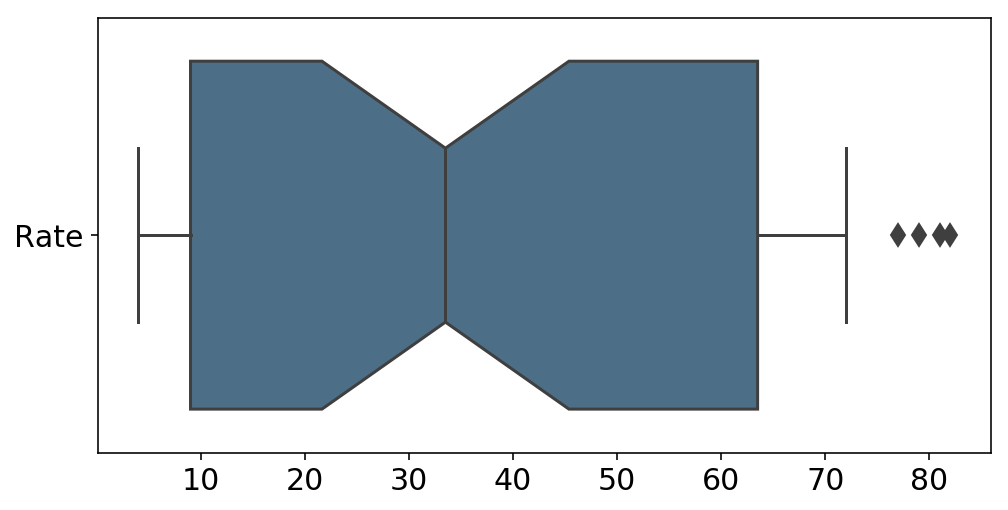

In [232]:
fig = plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Rate']], orient='h', 
            fliersize=8, notch=True,
            saturation=0.4, whis=0.2)
plt.show()

The outliers are usually the values that fall outside of the range  (75-25), were 75 and 25 are the percentile. In this case we will reduce the range to 0.2*(75%-25%)

In [233]:
def get_outliers(df, column):
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR_R = q3 - q1
    return q1, q3, IQR_R

In [234]:
q1, q3, IQR = get_outliers(df, 'Rate')


In [235]:
df.describe()

,Rate,Verbal,Math,Difference_Verbal_Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [236]:
print('Old mean, meadian and standard deviation')
print(df.Rate.mean(), df.Rate.median(), df.Rate.std())

Old mean, meadian and standard deviation
37.15384615384615 33.5 27.301788072869286


In [237]:
df['Rate'] = df['Rate'][(df['Rate'] > (q1 - 0.2 * IQR)) & (df['Rate'] < (q3 + 0.2 * IQR))].dropna()


In [238]:
df.describe()

,Rate,Verbal,Math,Difference_Verbal_Math
count,48.000000,52.000000,52.000000,52.000000
mean,33.604167,532.019231,531.500000,0.519231
std,25.322381,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,28.500000,526.500000,521.000000,0.000000
75%,56.250000,562.000000,555.750000,4.250000
max,72.000000,593.000000,603.000000,95.000000


In [239]:
print('New mean, median and std')
print(df.Rate.mean(), df.Rate.median(), df.Rate.std())

New mean, median and std
33.604166666666664 28.5 25.322380634389564


The 3 values are smaller as we reduced the range and all the outliers were on the maximum values.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [241]:
df.corr(method='spearman').loc['Verbal','Math']

0.9052048847940285

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [242]:
df['Perc']=df['Rate'].rank(pct=True)

In [244]:
df[df['State']=='CA']

,State,Rate,Verbal,Math,Difference_Verbal_Math,Perc
23,CA,51.0,498.0,517.0,-19.0,0.614583


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

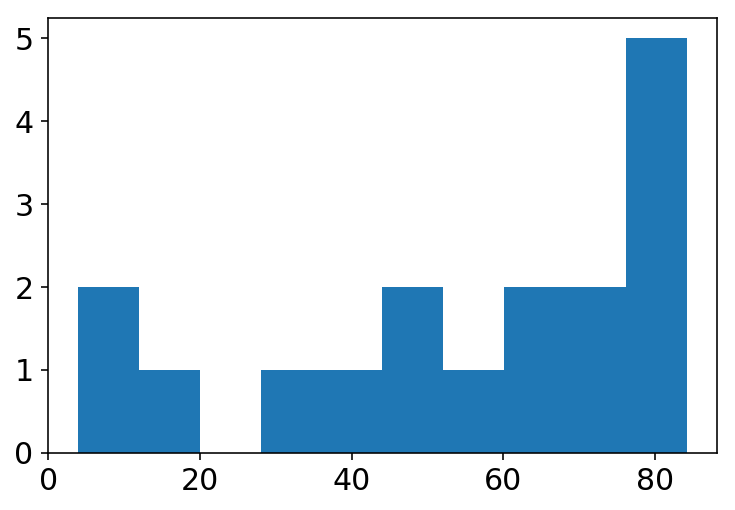

In [259]:
plt.hist(drug['alcohol-use'], bins=10)
plt.show()

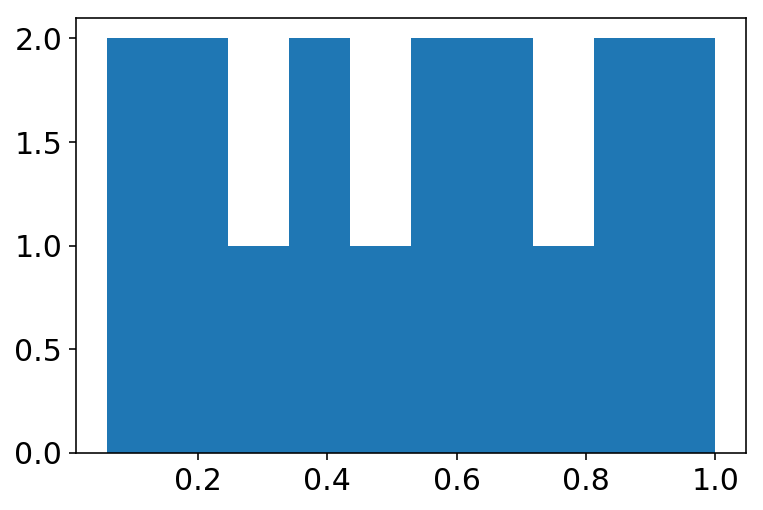

In [260]:
plt.hist(drug['alcohol-use'].rank(pct=True))
plt.show()


Percentile could be useful in case there are 